# Run validation tests of HippoUnit on the Katz et al. 2009 model of hippocampal CA1 pyramidal cell

The purpose of this notebook is to show how to run the validation tests of HippoUnit (https://github.com/KaliLab/hippounit) on the Katz et al. 2009 CA1 pyramidal cell model (ModelDB accession number: 127351).

The tests shall take as input a standalone version of the model (a hoc file) that should not display any GUI, or contain any built in simulations and run-time modifications.
The hoc file that is used in this notebook is available here:
https://github.com/KaliLab/HippoUnit_demo/blob/master/published_models/Katz_et_al_2009_2stageintegration_code/main_model.hoc

Target experimental data that are used by the validation tests in this notebook are available here: 
https://github.com/KaliLab/HippoUnit_demo/tree/master/target_features

In [1]:
from __future__ import print_function

%matplotlib inline

from hippounit.utils import ModelLoader
from hippounit import tests

from json2html import *
import pkg_resources
import json
import collections
import numpy
import IPython

## Instantiating the model

The ModelLoader class of HippoUnit is instantiated and the model, and simulation related parameters are set.

In [2]:
# path to mod files
mod_files_path = "../published_models/Katz_et_al_2009_2stageintegration_code/"

#all the outputs will be saved here. It will be an argument to the test.
base_directory = '../published_models_validation_results/'

#Load cell model
model = ModelLoader(mod_files_path = mod_files_path )

# outputs will be saved in subfolders named like this:
model.name="Katz_et_al_2009"

# path to hoc file
# the model must not display any GUI!!
model.hocpath = "../published_models/Katz_et_al_2009_2stageintegration_code/main_model.hoc"

# If the hoc file doesn't contain a template, this must be None (the default value is None)
model.template_name = None

# model.SomaSecList_name should be None, if there is no Section List in the model for the soma, or if the name of the soma section is given by setting model.soma (the default value is None)
model.SomaSecList_name = None
# if the soma is not in a section list or to use a specific somatic section, add its name here:
model.soma = 'somaA'

# For the PSP Attenuation Test, and Back-propagating AP Test a section list containing the trunk sections is needed
model.TrunkSecList_name = 'primary_apical_list'
# For the Oblique Integration Test a section list containing the oblique dendritic sections is needed
model.ObliqueSecList_name = 'oblique_dendrites'
# For the Pathway Interaction Test a section list containing the tuft dendritic sections is needed
model.TuftSecList_name = 'tuft_dendrites'

#This will be argument to those tests, where dendritic locatins are selected according to distances. If not set, the end of the above given soma section will be used as reference point for distance determination
trunk_origin = ['somaA', 0] 

# It is important to set the v_init and the celsius parameters of the simulations here,
# as if they are only set in the model's files, they will be overwritten with the default values of the ModelLoader class.
# default values: v_init = -70, celsius = 34 
model.v_init = -70
model.celsius = 35


/home/saray/.local/lib/python3.8/site-packages/hippounit-1.4.0-py3.8.egg/hippounit/tests/default_NMDAr
Mod files: "./NMDA_CA1_pyr_SC.mod"

Creating x86_64 directory for .o files.

COBJS=''
 -> Compiling mod_func.c
x86_64-linux-gnu-gcc -O2   -I.   -I/home/saray/.local/lib/python3.8/site-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c mod_func.c -o mod_func.o
 -> NMODL ../NMDA_CA1_pyr_SC.mod
(cd ".."; MODLUNIT=/home/saray/.local/lib/python3.8/site-packages/neuron/.data/share/nrn/lib/nrnunits.lib /home/saray/.local/lib/python3.8/site-packages/neuron/.data/bin/nocmodl NMDA_CA1_pyr_SC.mod -o "/home/saray/.local/lib/python3.8/site-packages/hippounit-1.4.0-py3.8.egg/hippounit/tests/default_NMDAr/x86_64")
 -> Compiling NMDA_CA1_pyr_SC.c
x86_64-linux-gnu-gcc -O2   -I".." -I.   -I/home/saray/.local/lib/python3.8/site-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c NMDA_CA1_pyr_SC.c -o NMDA_CA1_pyr_SC.o


Translating NMDA_CA1_pyr_SC.mod into /home/saray/.local/lib/python3.8/site-packages/hippounit-1.4.0-py3.8.egg/hippounit/tests/default_NMDAr/x86_64/NMDA_CA1_pyr_SC.c
Thread Safe


 => LINKING shared library ./libnrnmech.so
x86_64-linux-gnu-g++ -O2 -DVERSION_INFO='8.0.0' -std=c++11 -shared -fPIC  -I /home/saray/.local/lib/python3.8/site-packages/neuron/.data/include -o ./libnrnmech.so -Wl,-soname,libnrnmech.so \
  ./mod_func.o ./NMDA_CA1_pyr_SC.o  -L/home/saray/.local/lib/python3.8/site-packages/neuron/.data/lib -lnrniv -Wl,-rpath,/home/saray/.local/lib/python3.8/site-packages/neuron/.data/lib   
rm -f ./.libs/libnrnmech.so ; mkdir -p ./.libs ; cp ./libnrnmech.so ./.libs/libnrnmech.so
Successfully created x86_64/special


## Instantiating and running the tests of HippoUnit on the model

At the end of each test, the user is provided with a textual summary of the score and the path to related output files generated by the tests.

### Somatic Features Test - UCL data set

It evaluates the model against various eFEL (https://github.com/BlueBrain/eFEL) features under somatic current injection of varying amplitudes. The experimental dataset used for validation is obtained from sharp electrode recordings in rats at UCL (Migliore et al. 2018  https://doi.org/10.1371/journal.pcbi.1006423). 

In [3]:
# Load target data
with open('../target_features/feat_CA1_pyr_cACpyr_more_features.json') as f:
    observation = json.load(f, object_pairs_hook=collections.OrderedDict)

- running amplitude: -1.0 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: -0.6 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: -0.4 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: -0.2 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: -0.8 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: 0.2 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: 0.4 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: 0.8 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: 0.6 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: 1.0 on model: Katz_et_al_2009 at: somaA(0.5)
The figures are saved in the directory:  ../published_models_validation_results/figs/somaticfeat_UCL_data/Katz_et_al_2009/
Number of features succesfully evaluated: 232/232
Results are saved in the directory:  ../published_models_validation_results/results/somaticfeat_UCL_data/Katz_et_al_2009/


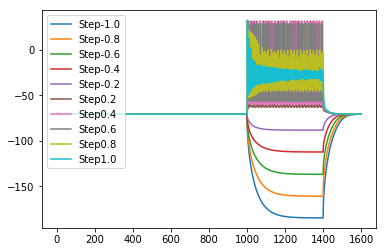

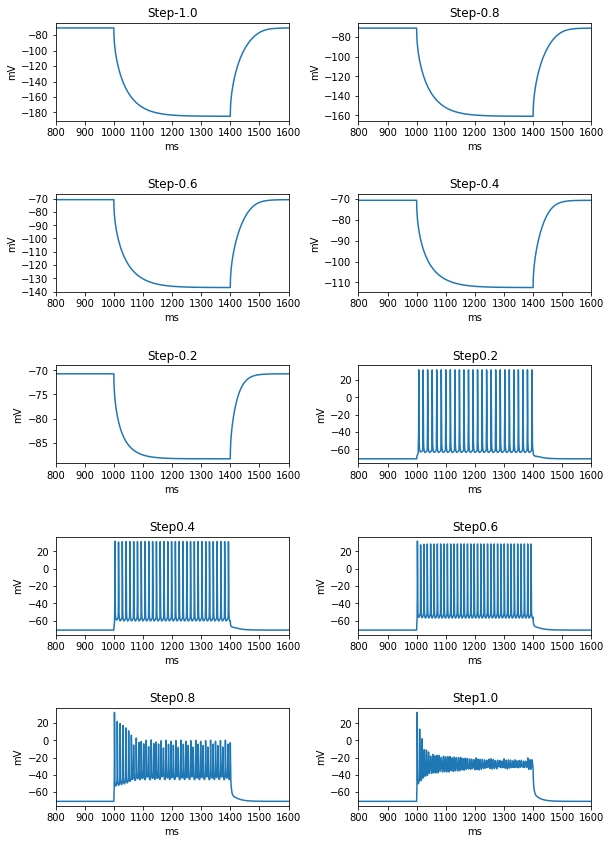

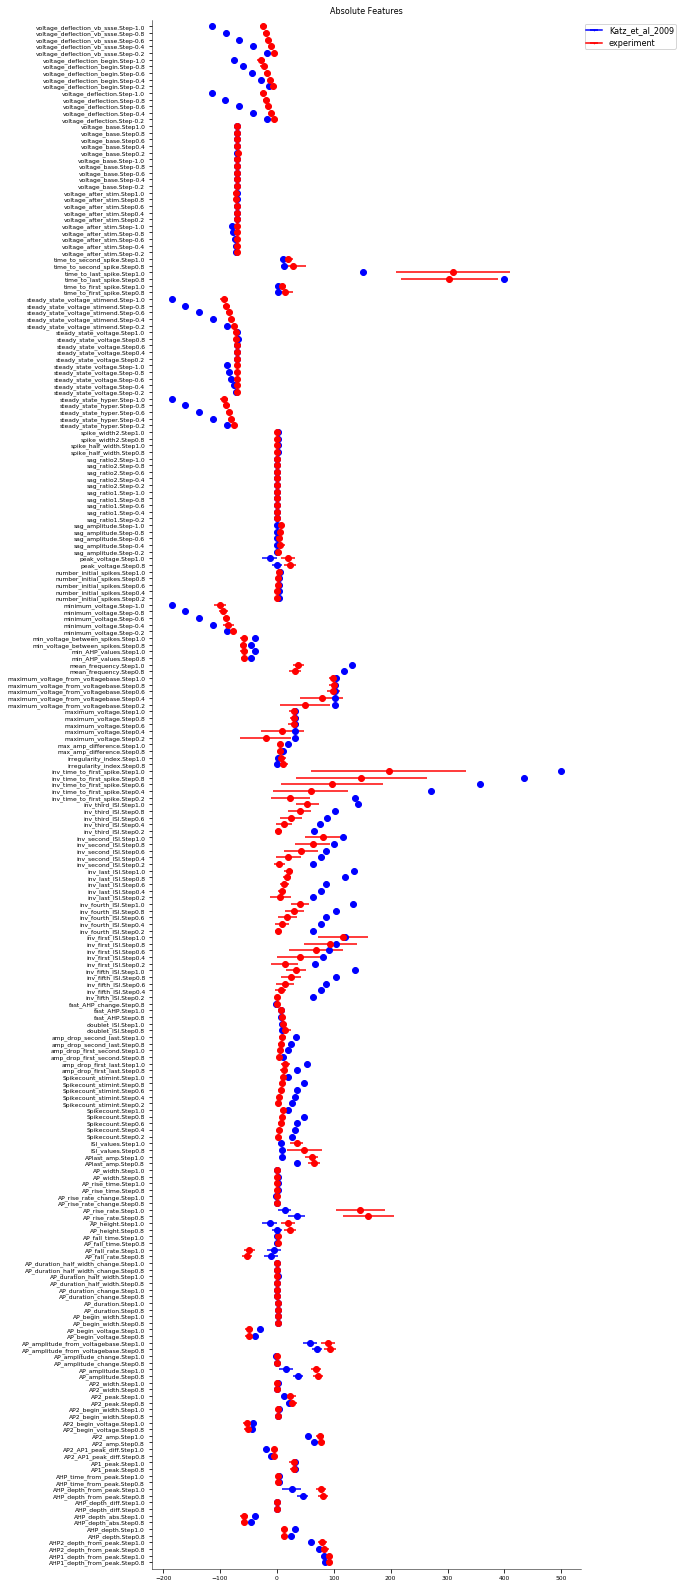

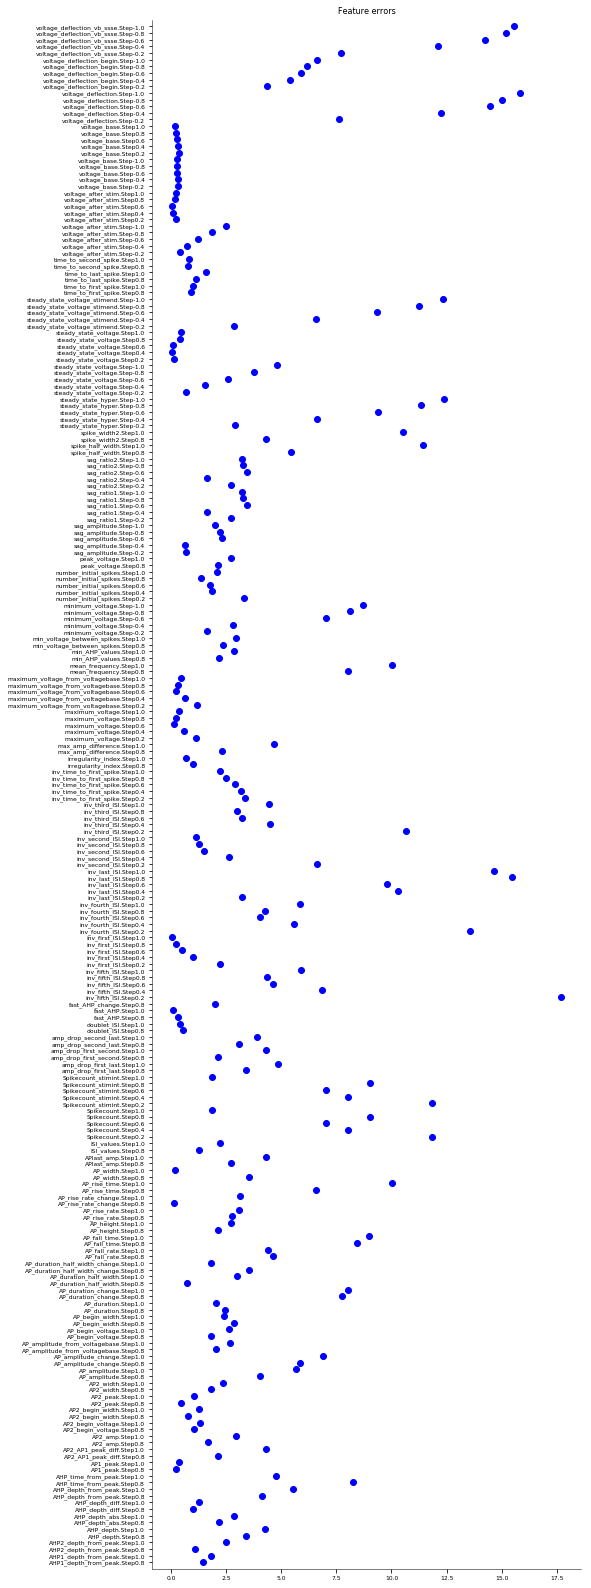

In [4]:
# Load stimuli file
ttype = "CA1_pyr_cACpyr"

stim_file = pkg_resources.resource_filename("hippounit", "tests/stimuli/somafeat_stim/stim_" + ttype + ".json")
with open(stim_file, 'r') as f:
    config = json.load(f, object_pairs_hook=collections.OrderedDict)
    
# Instantiate test class   
test = tests.SomaticFeaturesTest(observation=observation, config=config, force_run=False, show_plot=True, save_all = True, base_directory=base_directory)

# test.specify_data_set is added to the name of the subdirectory (somaticfeat), so test runs using different data sets can be saved into different directories
test.specify_data_set = 'UCL_data'

# Number of parallel processes
test.npool = 10
    
try:
    #Run the test 
    score = test.judge(model)
    #Summarize and print the score achieved by the model on the test using SciUnit's summarize function
    score.summarize()
except Exception as e:
    print('Model: ' + model.name + ' could not be run')
    print(e)
    pass

### Somatic Features Test - JMakara data set

It evaluates the model against various eFEL (https://github.com/BlueBrain/eFEL) features under somatic current injection of varying amplitudes. The experimental dataset used for validation is obtained from patch clamp recordings in rats by Judit Makara.

In [5]:
# Load target data
with open('../target_features/feat_rat_CA1_JMakara_more_features.json') as f:
    observation = json.load(f, object_pairs_hook=collections.OrderedDict)

- running amplitude: 0.05 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: 0.1 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: 0.15 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: -0.1 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: -0.2 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: -0.25 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: -0.05 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: 0.2 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: -0.15 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: 0.25 on model: Katz_et_al_2009 at: somaA(0.5)
The figures are saved in the directory:  ../published_models_validation_results/figs/somaticfeat_JMakara_data/Katz_et_al_2009/
Features excluded (due to invalid values): initburst_sahp.Step0.25, initburst_sahp_ssse.Step0.25, initburst_sahp_vb.Step0.25
Number of features succesfully evaluated: 302/305
Results are saved in the di

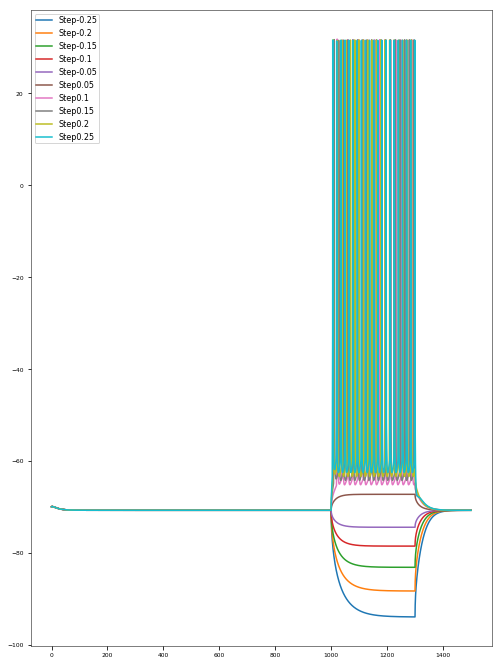

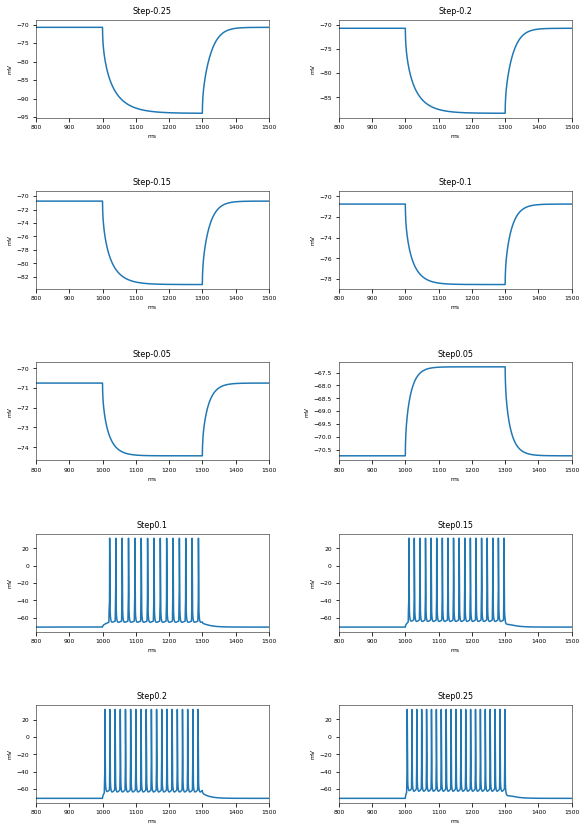

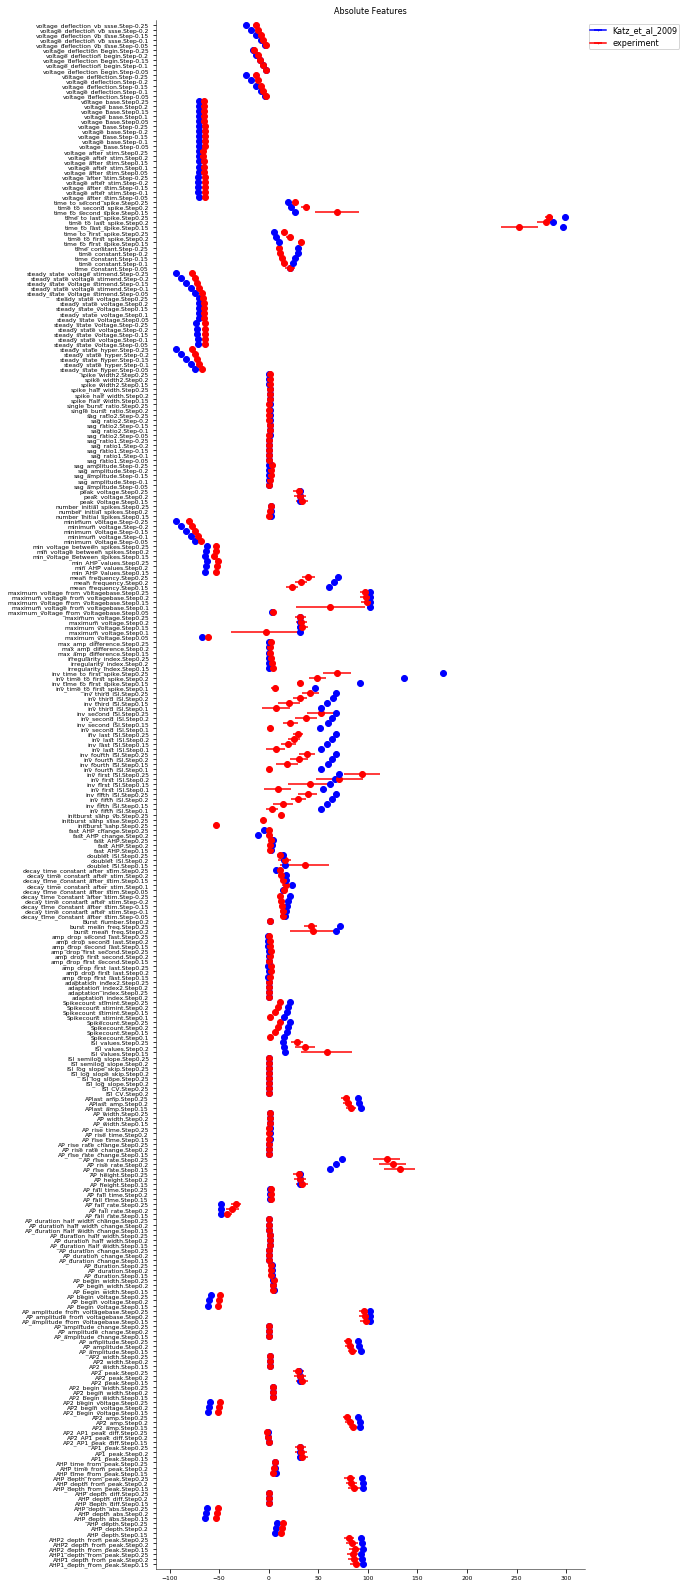

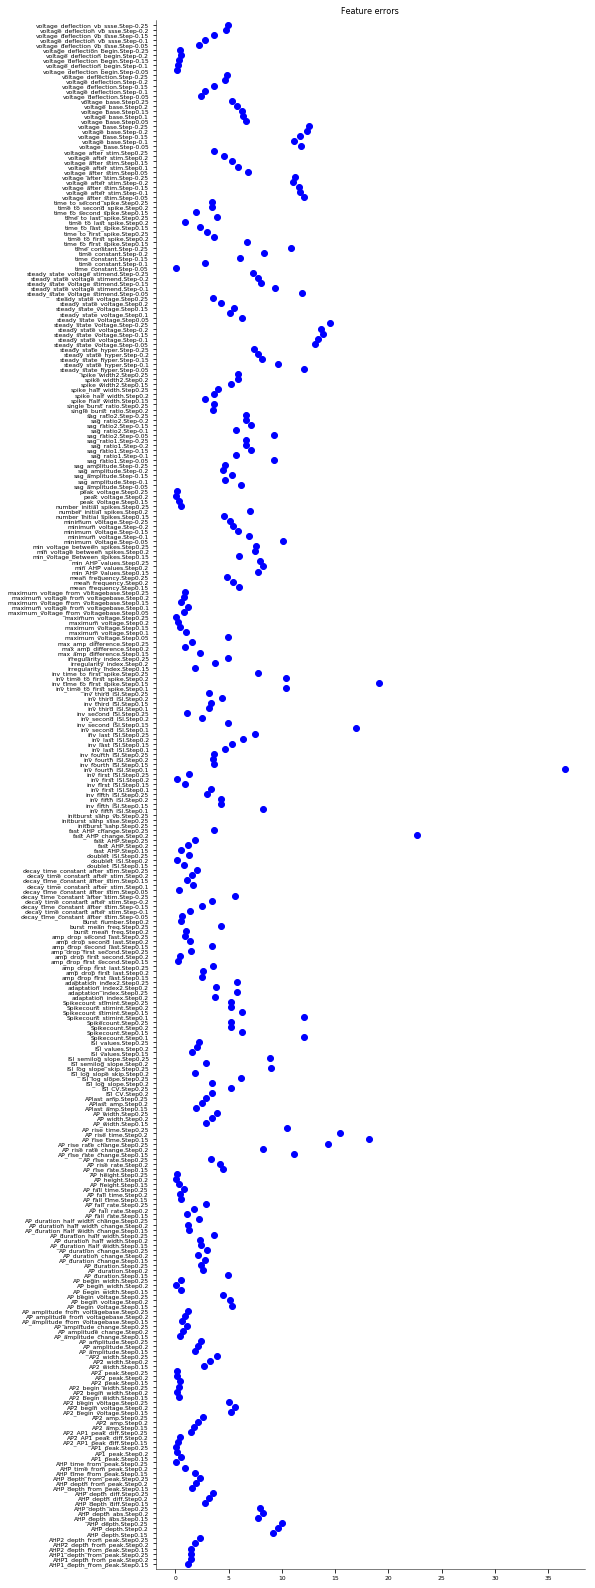

In [6]:
# Load stimuli file
stim_file = pkg_resources.resource_filename("hippounit", "tests/stimuli/somafeat_stim/stim_rat_CA1_PC_JMakara.json")
with open(stim_file, 'r') as f:
    config = json.load(f, object_pairs_hook=collections.OrderedDict)
    
# Instantiate test class   
test = tests.SomaticFeaturesTest(observation=observation, config=config, force_run=False, show_plot=True, save_all = True, base_directory=base_directory)

# test.specify_data_set is added to the name of the subdirectory (somaticfeat), so test runs using different data sets can be saved into different directories
test.specify_data_set = 'JMakara_data'

# Number of parallel processes
test.npool = 10

try:
    #Run the test 
    score = test.judge(model)
    #Summarize and print the score achieved by the model on the test using SciUnit's summarize function
    score.summarize()
except Exception as e:
    print('Model: ' + model.name + ' could not be run')
    print(e)
    pass

### PSP Attenuatuion Test

The PSP Attenuation Test evaluates how much the post synaptic potential (using EPSC stimulus) attenuates from the main apical dendrite (different distances) to the soma. The soma/dendrite attenuation is compared to data from Magee & Cook 2000 (http://dx.doi.org/10.1038/78800).

In [7]:
# Load target data
with open("../target_features/feat_PSP_attenuation_target_data.json", 'r') as f:
    observation = json.load(f, object_pairs_hook=collections.OrderedDict)

IPython.display.HTML(json2html.convert(json = observation))

Dendritic locations to be tested (with their actual distances): {('dendA5_0111111111111', 0.9285714285714284): 278.8585387217133, ('dendA5_011111111111', 0.5): 239.79096715191383, ('dendA5_011111111', 0.5): 200.31189809350136, ('dendA5_01111111111111', 0.8636363636363638): 322.72005649527625, ('dendA5_01', 0.5): 56.19888262225582, ('dendA5_01111111', 0.16666666666666666): 191.3337915422833, ('dendA5_01', 0.7727272727272728): 71.86747110540054, ('dendA5_011111111111111', 0.8333333333333333): 337.0317515174673, ('dendA5_0111111111', 0.30000000000000004): 209.08951965594616, ('dendA5_0111111', 0.9285714285714284): 187.64906441420356, ('dendA5_0111111111', 0.7): 217.31184133531076, ('dendA5_0111111', 0.7857142857142856): 182.82650065736274, ('dendA5_01111111', 0.5): 193.880682041602, ('dendA5_01111111111111', 0.9545454545454547): 327.083638729302, ('dendA5_0111', 0.5): 109.82321709039796}
input at: dendA5_01(0.5) with weight: 0.0
input at: dendA5_01111111111111(0.8636363636363638) with wei

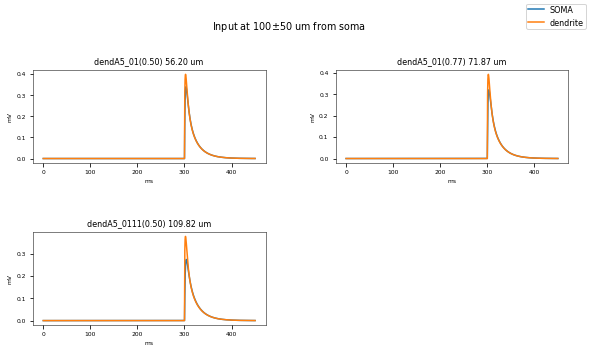

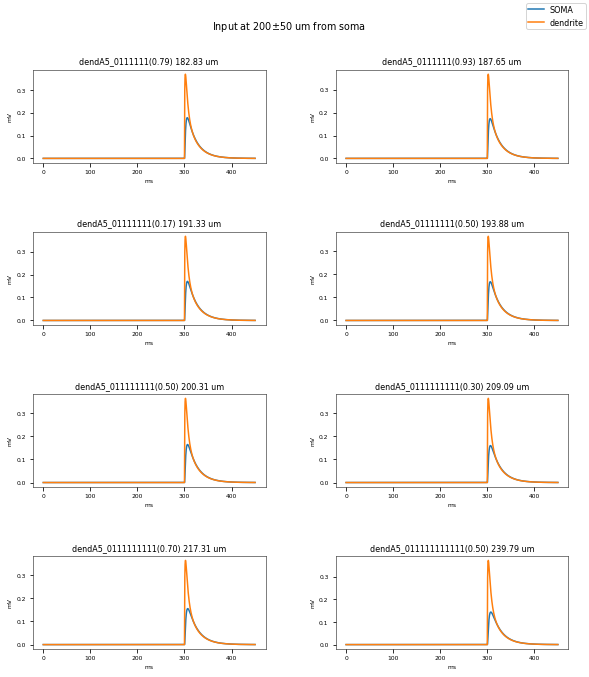

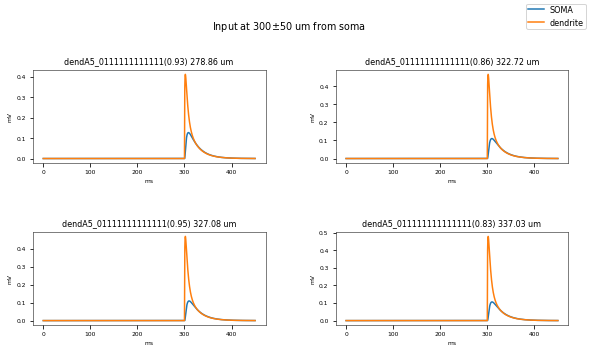

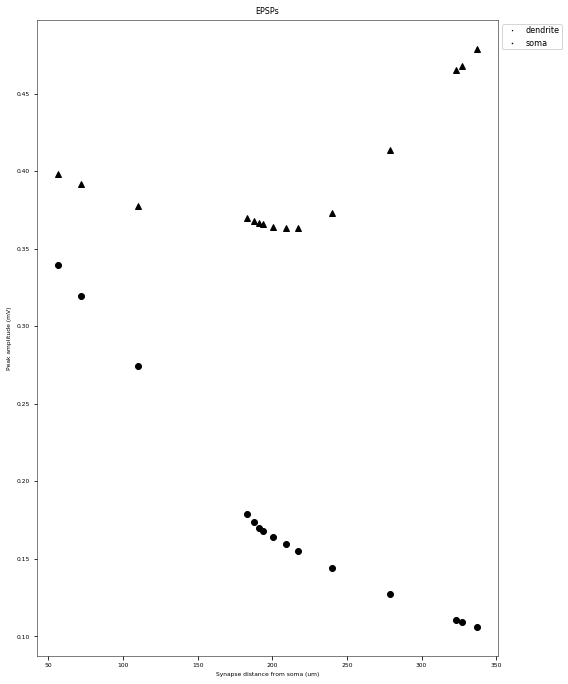

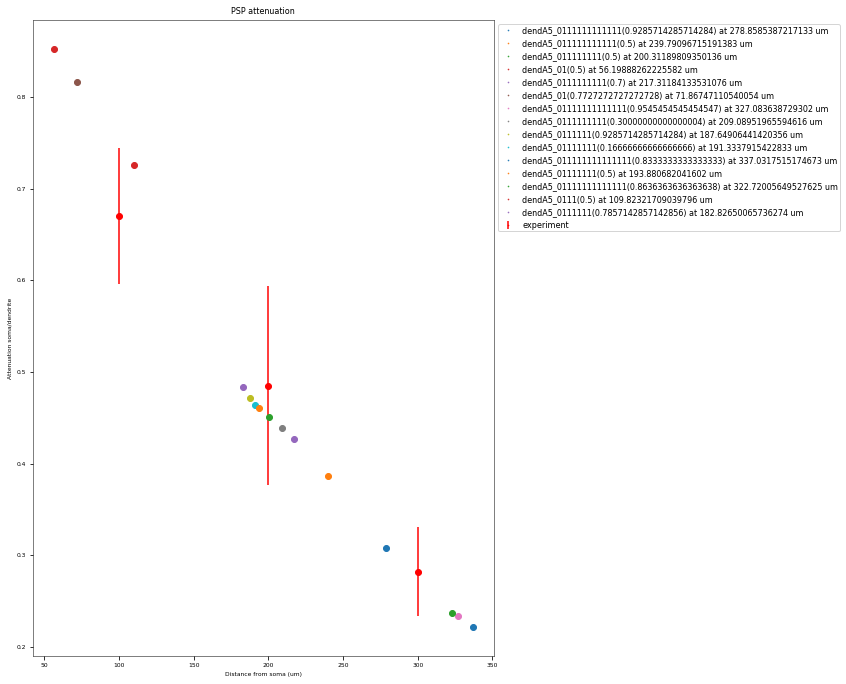

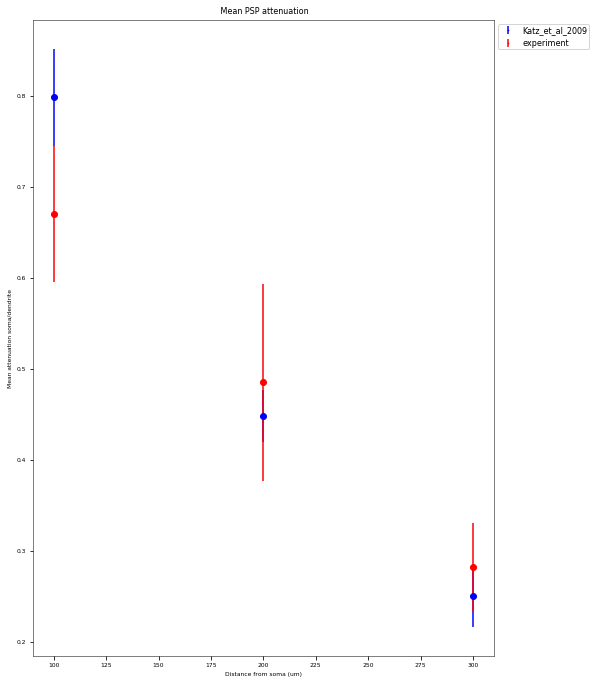

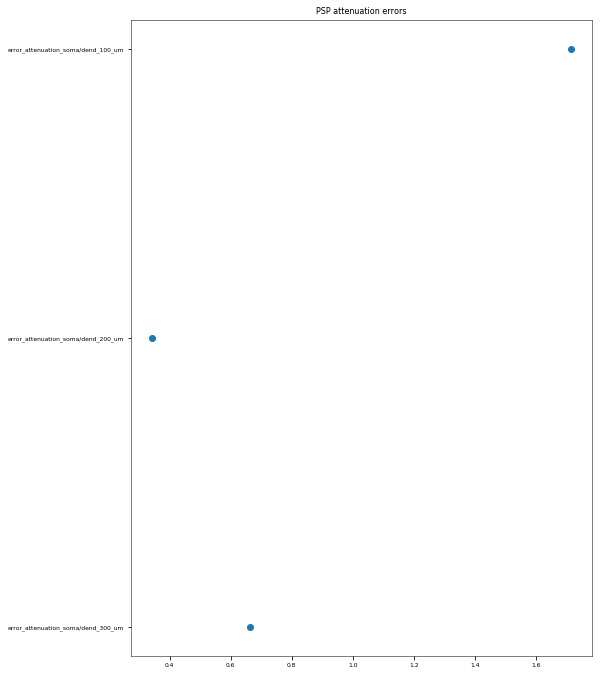

In [8]:
# Load stimuli file
stim_file = pkg_resources.resource_filename("hippounit", "tests/stimuli/PSP_attenuation_stim/stim_PSP_attenuation_test.json")

with open(stim_file, 'r') as f:
    config = json.load(f, object_pairs_hook=collections.OrderedDict)

# Instantiate test class 
test = tests.PSPAttenuationTest(config=config, observation=observation, num_of_dend_locations = 15, force_run=False, show_plot=True, save_all = True, base_directory=base_directory)
            
# Number of parallel processes
test.npool = 10

try: 
    # Run the test 
    score = test.judge(model)
    #Summarize and print the score achieved by the model on the test using SciUnit's summarize function
    score.summarize()
except Exception as e:
    print('Model: ' + model.name + ' could not be run')
    print(e)
    pass 

### Back-Propagating AP Test

The Back-Propagating AP Test evaluates the mode and efficacy of back-propagating action potentials on the apical trunk in locations of different distances from the soma. The amplitude of the first and last AP of around 15 Hz train is compared to experimental data from Golding et al. 2001 (https://doi.org/10.1152/jn.2001.86.6.2998).

In [9]:
# Load target data
with open('../target_features/feat_backpropagating_AP_target_data.json') as f:
    observation = json.load(f, object_pairs_hook=collections.OrderedDict)

IPython.display.HTML(json2html.convert(json = observation))

Dendritic locations to be tested (with their actual distances): {('dendA5_0111111111111111', 0.3823529411764706): 368.5420607141201, ('dendA5_011111111111', 0.8333333333333333): 244.9711314290168, ('dendA5_01', 0.40909090909090906): 50.976019794540925, ('dendA5_0111111111111', 0.49999999999999994): 264.4136194198002, ('dendA5_01', 0.6818181818181819): 66.64460827768563, ('dendA5_0111111111111111', 0.029411764705882353): 340.88940391803794, ('dendA5_0111111111111111', 0.3235294117647059): 363.93328458143975, ('dendA5_01', 0.045454545454545456): 30.084568483681313, ('dendA5_0111111', 0.3571428571428571): 168.35880938684022, ('dendA5_01', 0.22727272727272727): 40.53029413911112, ('dendA5_011111111111111', 0.16666666666666666): 330.8186941805453, ('dendA5_011111', 0.5): 150.49165189616144, ('dendA5_0111111111111', 0.6428571428571428): 269.2285925204379, ('dendA5_0111111111111111', 0.2647058823529412): 359.3245084487594, ('dendA5_01', 0.13636363636363635): 35.307431311396215, ('dendA5_01111

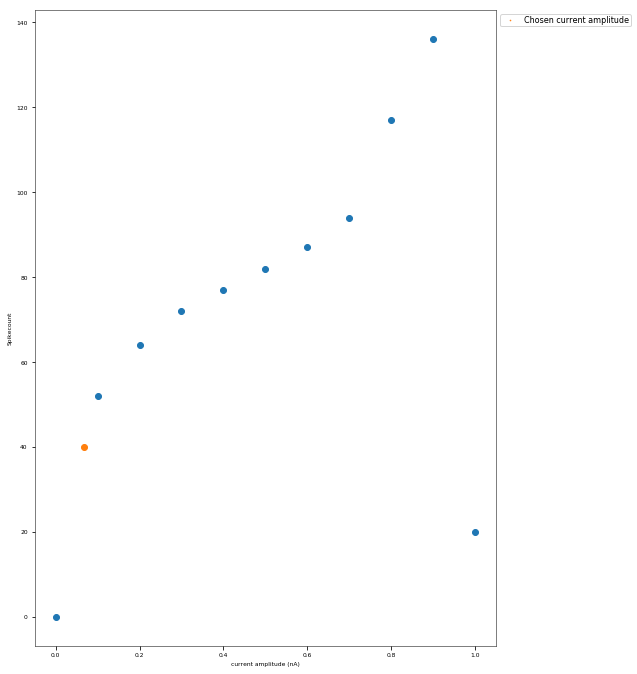

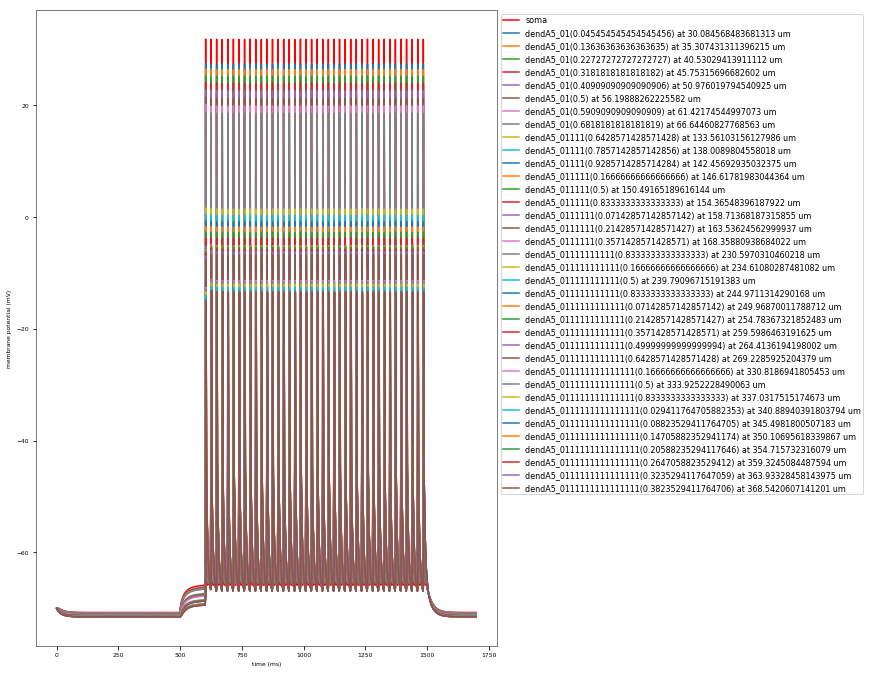

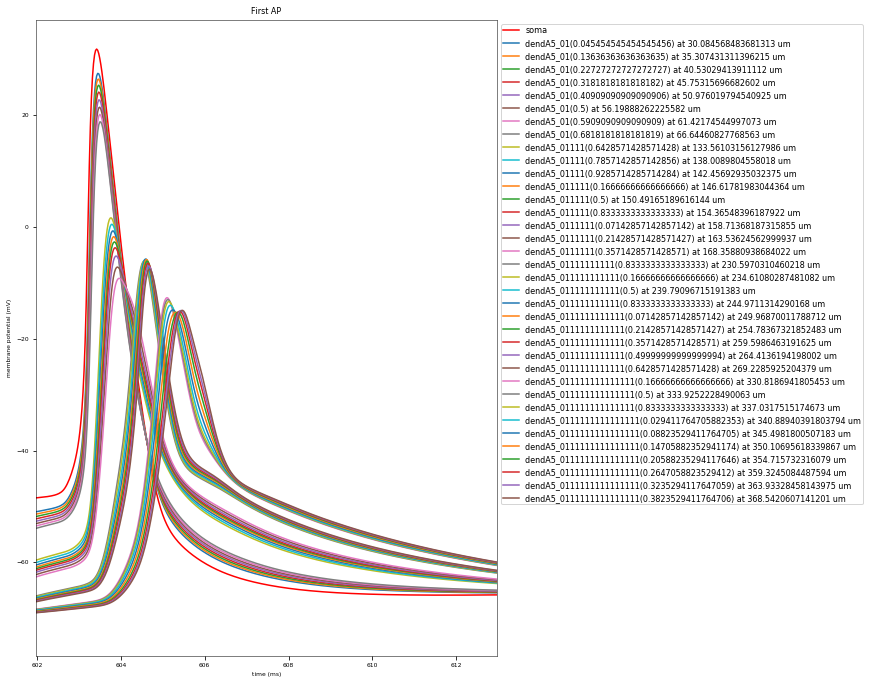

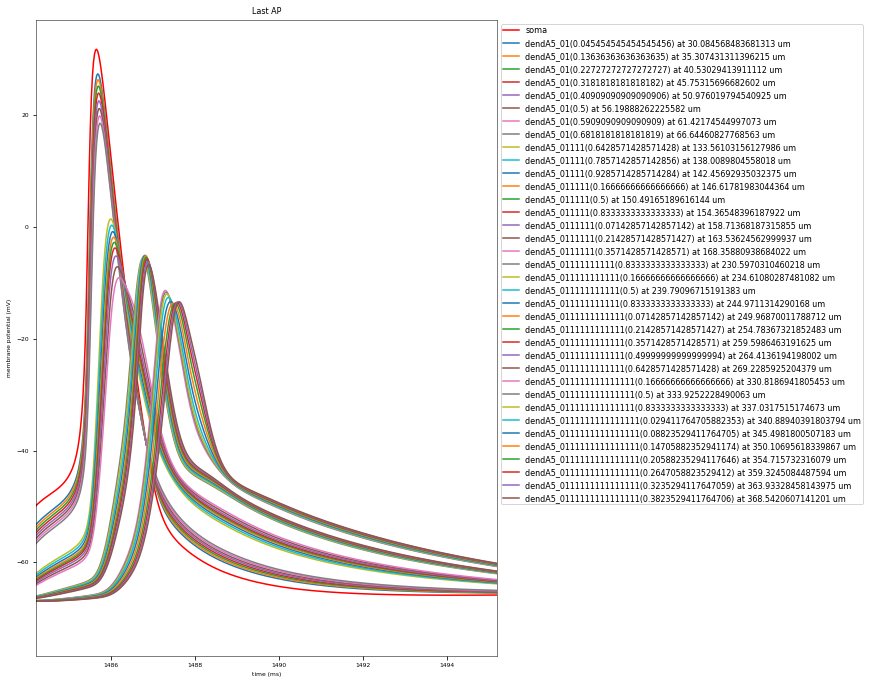

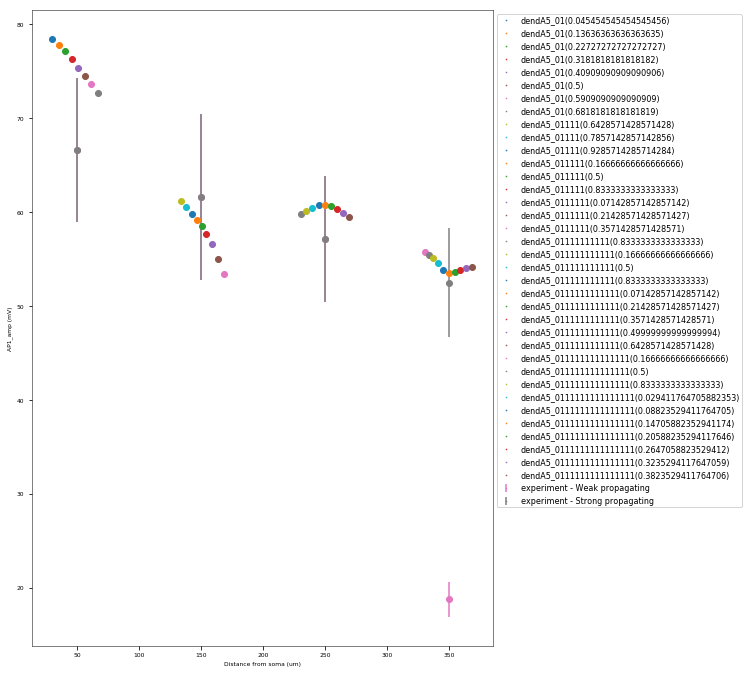

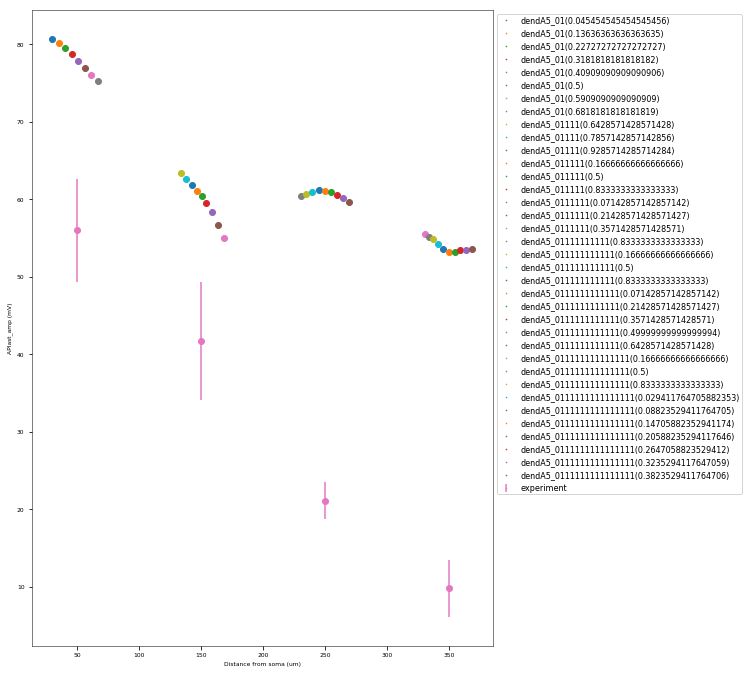

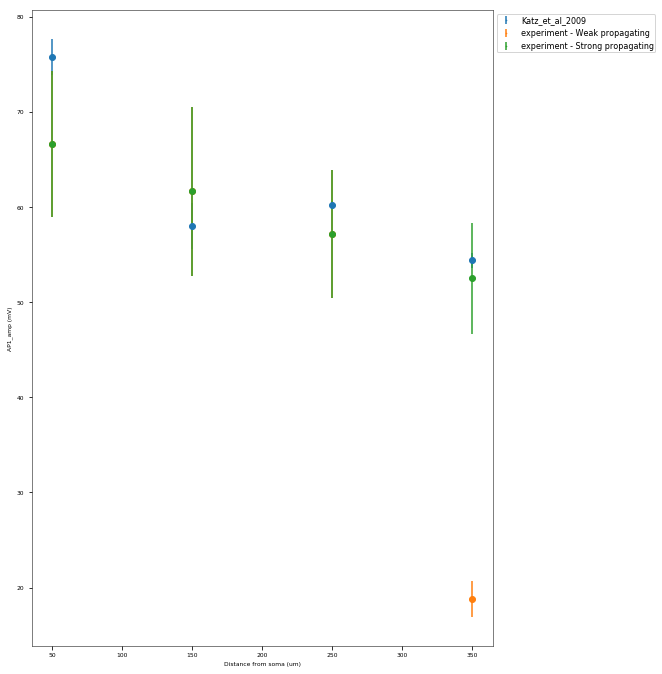

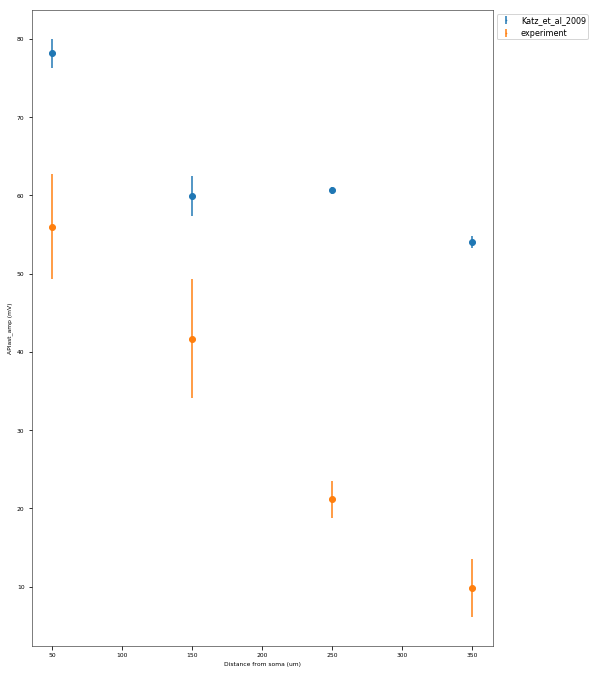

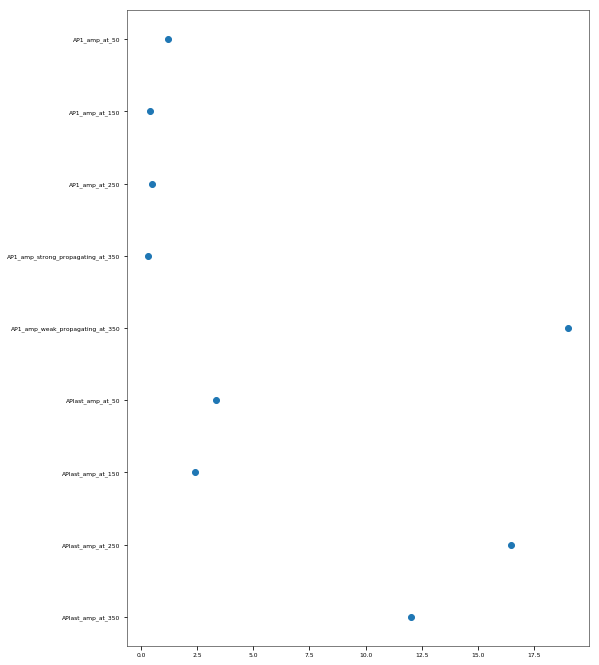

This is a rather STRONG propagating model


In [10]:
# Load stimuli file
stim_file = pkg_resources.resource_filename("hippounit", "tests/stimuli/bAP_stim/stim_bAP_test.json")

with open(stim_file, 'r') as f:
    config = json.load(f, object_pairs_hook=collections.OrderedDict)

# Instantiate the test class
test = tests.BackpropagatingAPTest(config=config, observation=observation, force_run=False, force_run_FindCurrentStim=False, show_plot=True, save_all=True, base_directory=base_directory)

# Number of parallel processes
test.npool = 10

try: 
    # Run the test
    score = test.judge(model)
    #Summarize and print the score achieved by the model on the test using SciUnit's summarize function
    score.summarize()
except Exception as e:
    print('Model: ' + model.name + ' could not be run')
    print(e)
    pass 

### Depolarization-block Test

The Depolarization Block Test aims to determine whether the model enters depolarization block to prolonged, high intensity somatic current stimulus. It compares the current intensity to which the model fires the maximum number of action potentials, the current intensity before the model enters depolarization block (the two should be equal) and the equilibrium potential during depolarization block to the experimental data of Bianchi et al. 2012 (http://dx.doi.org/10.1007/s10827-012-0383-y).

In [11]:
# Load target data
with open('../target_features/depol_block_target_data.json') as f:
    observation = json.load(f, object_pairs_hook=collections.OrderedDict)

IPython.display.HTML(json2html.convert(json = observation))

- running amplitude: 0.0 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: 0.05 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: 0.15000000000000002 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: 0.1 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: 0.30000000000000004 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: 0.4 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: 0.35000000000000003 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: 0.2 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: 0.25 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: 0.45 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: 0.5 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: 0.55 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: 0.6000000000000001 on model: Katz_et_al_2009 at: somaA(0.5)
- running amplitude: 0.65 on model: Katz_et_al_2009 at: somaA(0.5)
- runnin

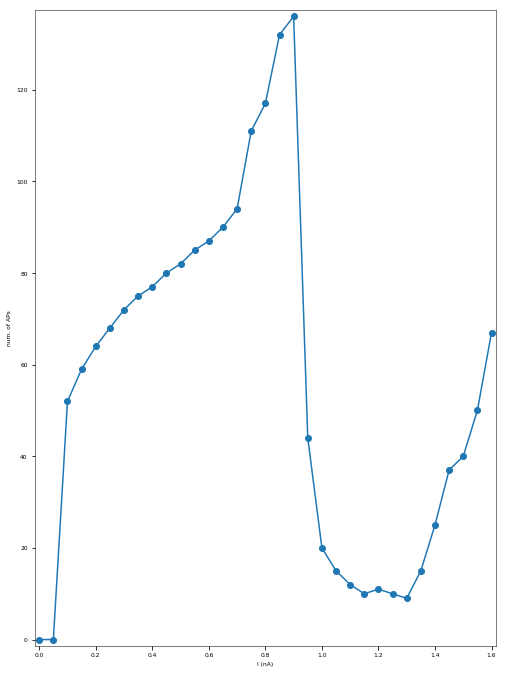

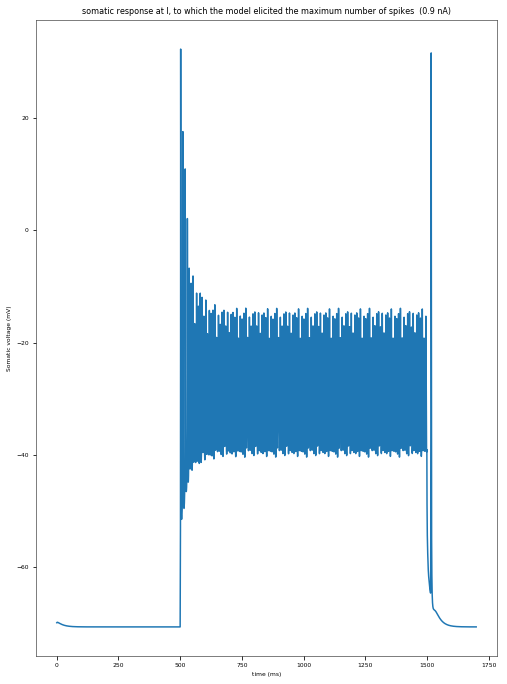

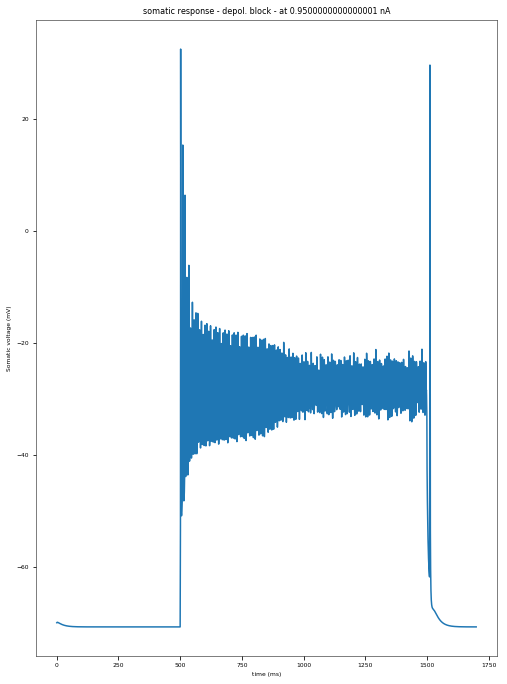

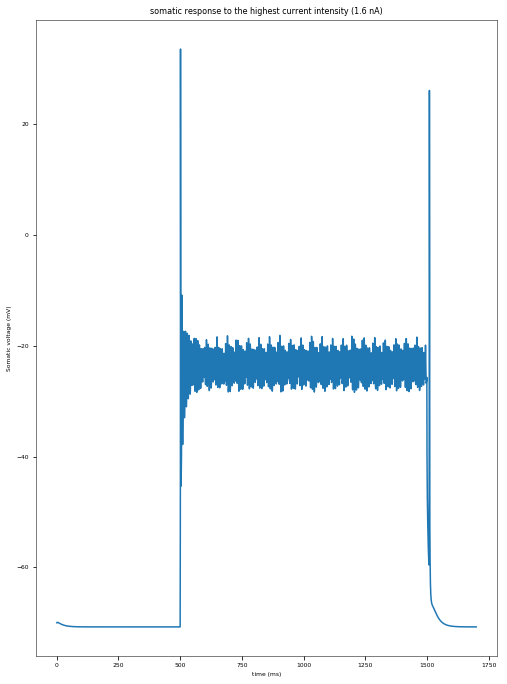

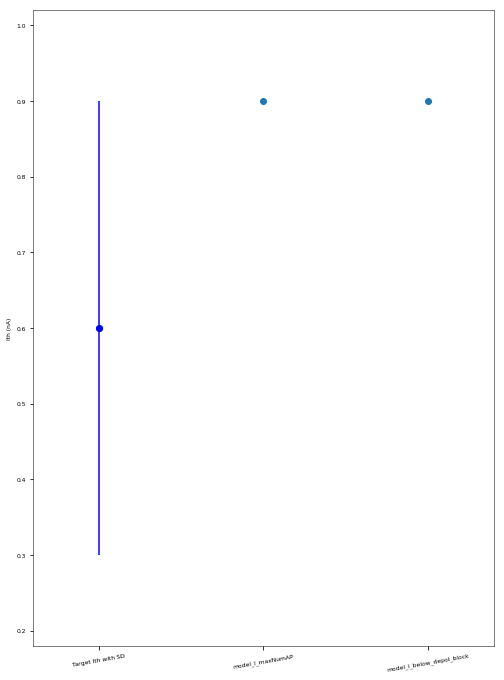

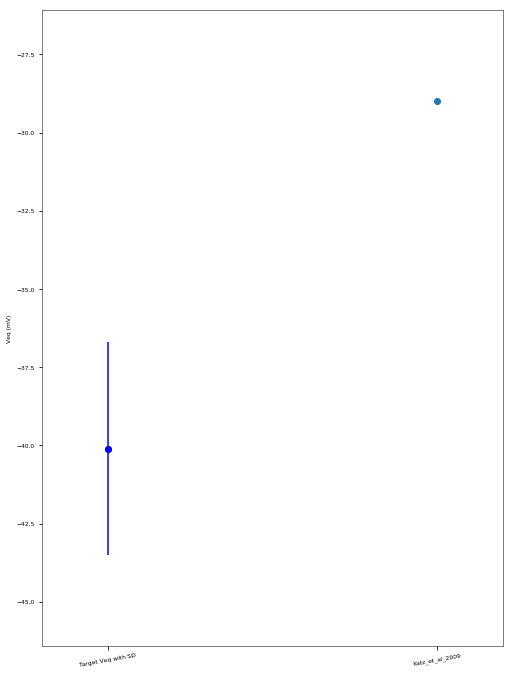

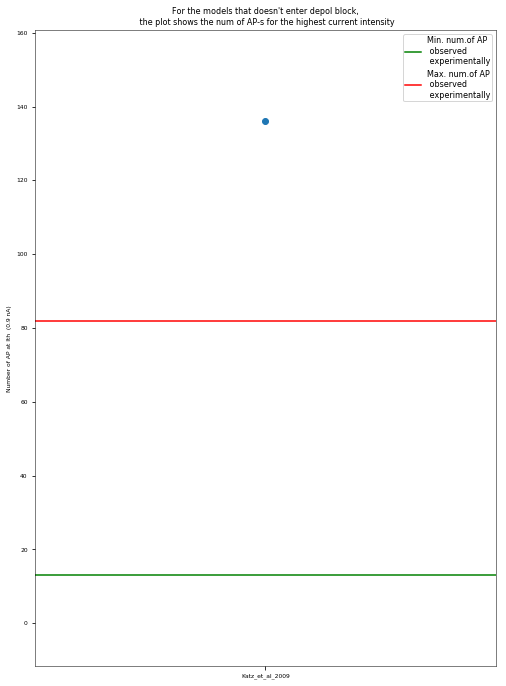

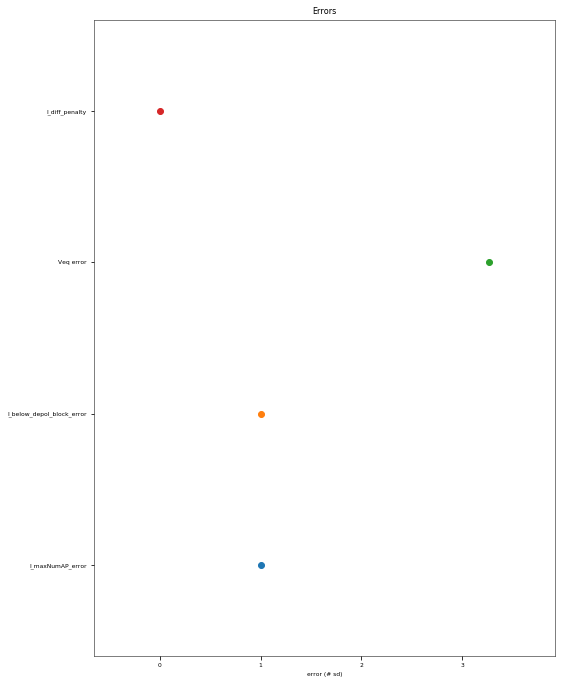

In [12]:
# Instantiate the test class

test = tests.DepolarizationBlockTest(observation=observation, force_run=False, show_plot=True, save_all=True, base_directory=base_directory)

# Number of parallel processes
test.npool = 10

try: 
    # Run the test
    score = test.judge(model)
    #Summarize and print the score achieved by the model on the test using SciUnit's summarize function
    score.summarize()
except Exception as e:
    print('Model: ' + model.name + ' could not be run')
    print(e)
    pass 

### Oblique Integration Test

Tests signal integration in oblique dendrites for increasing number of synchronous and asynchronous synaptic inputs. The experimental data is obtained from Losonczy and Magee 2006 (https://doi.org/10.1016/j.neuron.2006.03.016).

In [13]:
# Load target data
with open('../target_features/oblique_target_data.json') as f:
    observation = json.load(f, object_pairs_hook=collections.OrderedDict)

IPython.display.HTML(json2html.convert(json = observation))

Dendrites and locations to be tested:  [['dendA5_00', 0.2096774193548387, 'prox'], ['dendA5_00', 0.6290322580645158, 'dist'], ['dendA5_0100', 0.6428571428571428, 'prox'], ['dendA5_0100', 0.9, 'dist'], ['dendA5_0101', 0.5909090909090909, 'prox'], ['dendA5_0101', 0.9, 'dist'], ['dendA5_01100', 0.1511627906976744, 'prox'], ['dendA5_01100', 0.4302325581395347, 'dist'], ['dendA5_011010', 0.6428571428571428, 'prox'], ['dendA5_011010', 0.9, 'dist'], ['dendA5_0110110', 0.5, 'prox'], ['dendA5_0110110', 0.9, 'dist'], ['dendA5_0110111', 0.34210526315789475, 'prox'], ['dendA5_0110111', 0.8157894736842102, 'dist'], ['dendA5_01110', 0.7, 'prox'], ['dendA5_01110', 0.9, 'dist']]

The built in Exp2Syn is used as the AMPA component. Tau1 = 0.2 ,Tau2 = 5 .


The default NMDA model of HippoUnit is used with Jahr, Stevens voltage dependence.

Adjusting synaptic weights on all the locations ...
- number of inputs: 0 dendrite: dendA5_00 xloc: 0.2096774193548387
- number of inputs: 9 dendrite: dendA5_00 xloc:

- number of inputs: 4 dendrite: dendA5_0110110 xloc: 0.5
- number of inputs: 5 dendrite: dendA5_0110110 xloc: 0.5
- number of inputs: 6 dendrite: dendA5_0110110 xloc: 0.5
- number of inputs: 7 dendrite: dendA5_0110110 xloc: 0.5
- number of inputs: 8 dendrite: dendA5_0110110 xloc: 0.5
- number of inputs: 9 dendrite: dendA5_0110110 xloc: 0.5
- number of inputs: 10 dendrite: dendA5_0110110 xloc: 0.5
- number of inputs: 0 dendrite: dendA5_0110110 xloc: 0.9
- number of inputs: 1 dendrite: dendA5_0110110 xloc: 0.9
- number of inputs: 2 dendrite: dendA5_0110110 xloc: 0.9
- number of inputs: 3 dendrite: dendA5_0110110 xloc: 0.9
- number of inputs: 4 dendrite: dendA5_0110110 xloc: 0.9
- number of inputs: 5 dendrite: dendA5_0110110 xloc: 0.9
- number of inputs: 6 dendrite: dendA5_0110110 xloc: 0.9
- number of inputs: 7 dendrite: dendA5_0110110 xloc: 0.9
- number of inputs: 8 dendrite: dendA5_0110110 xloc: 0.9
- number of inputs: 9 dendrite: dendA5_0110110 xloc: 0.9
- number of inputs: 10 dendrit

- number of inputs: 3 dendrite: dendA5_01100 xloc: 0.1511627906976744
- number of inputs: 4 dendrite: dendA5_01100 xloc: 0.1511627906976744
- number of inputs: 5 dendrite: dendA5_01100 xloc: 0.1511627906976744
- number of inputs: 6 dendrite: dendA5_01100 xloc: 0.1511627906976744
- number of inputs: 7 dendrite: dendA5_01100 xloc: 0.1511627906976744
- number of inputs: 8 dendrite: dendA5_01100 xloc: 0.1511627906976744
- number of inputs: 9 dendrite: dendA5_01100 xloc: 0.1511627906976744
- number of inputs: 10 dendrite: dendA5_01100 xloc: 0.1511627906976744
- number of inputs: 0 dendrite: dendA5_01100 xloc: 0.4302325581395347
- number of inputs: 1 dendrite: dendA5_01100 xloc: 0.4302325581395347
- number of inputs: 2 dendrite: dendA5_01100 xloc: 0.4302325581395347
- number of inputs: 3 dendrite: dendA5_01100 xloc: 0.4302325581395347
- number of inputs: 4 dendrite: dendA5_01100 xloc: 0.4302325581395347
- number of inputs: 5 dendrite: dendA5_01100 xloc: 0.4302325581395347
- number of inputs:

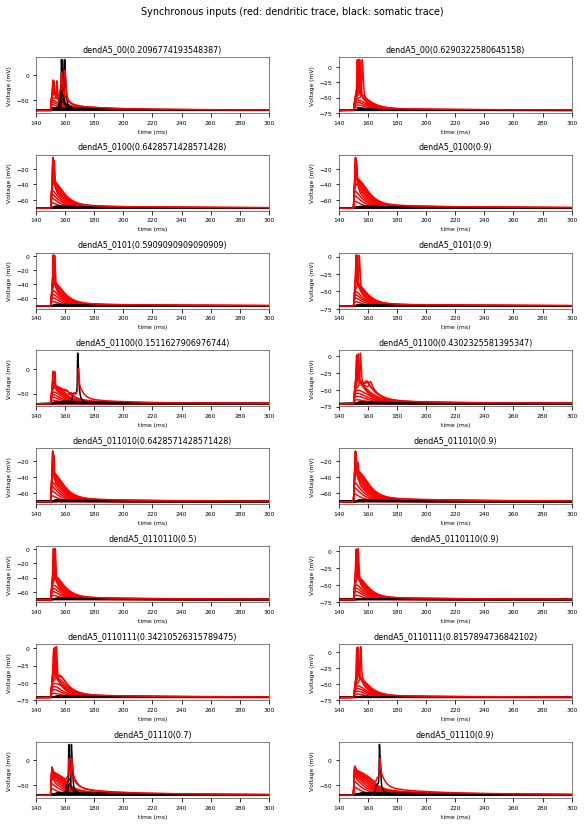

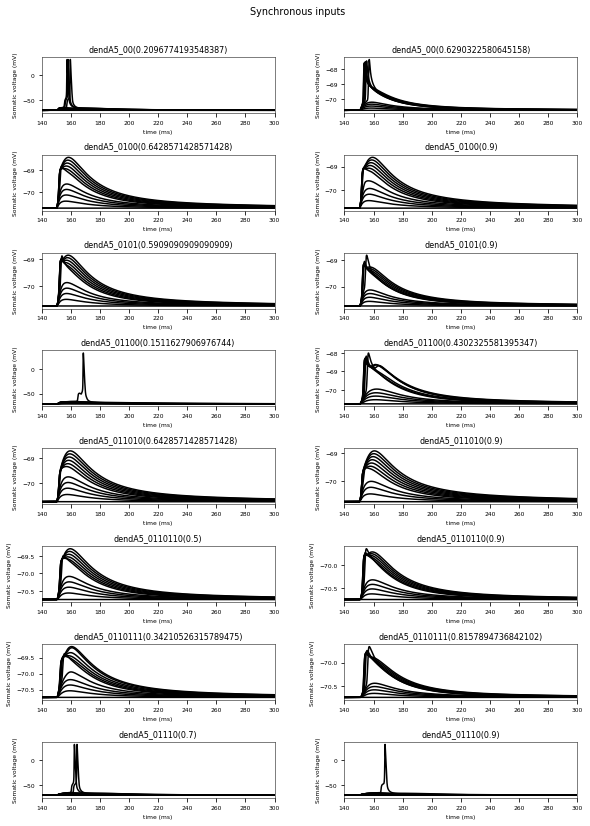

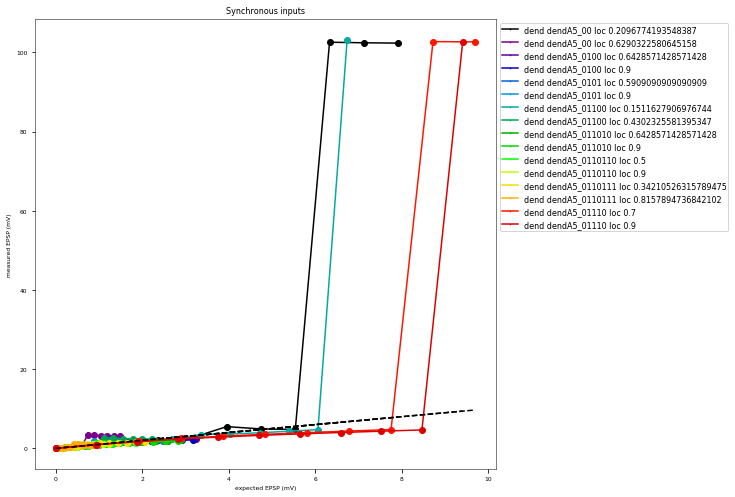

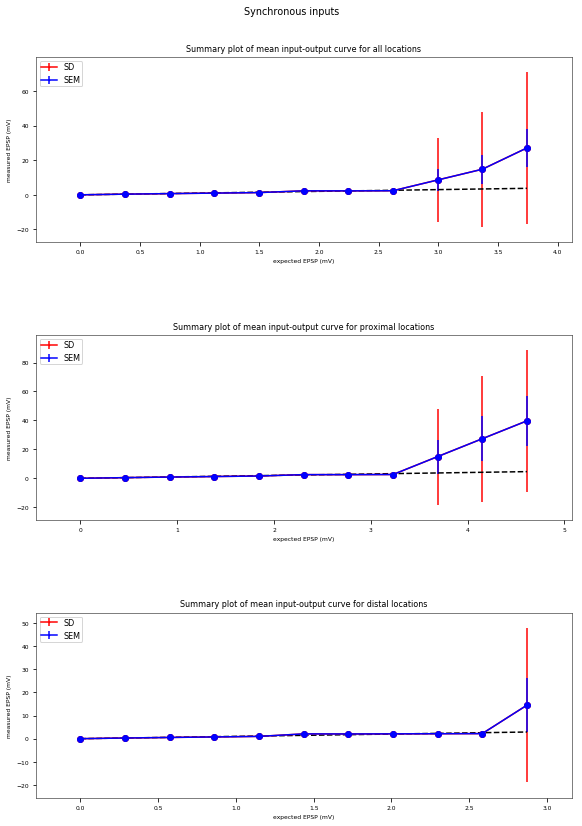

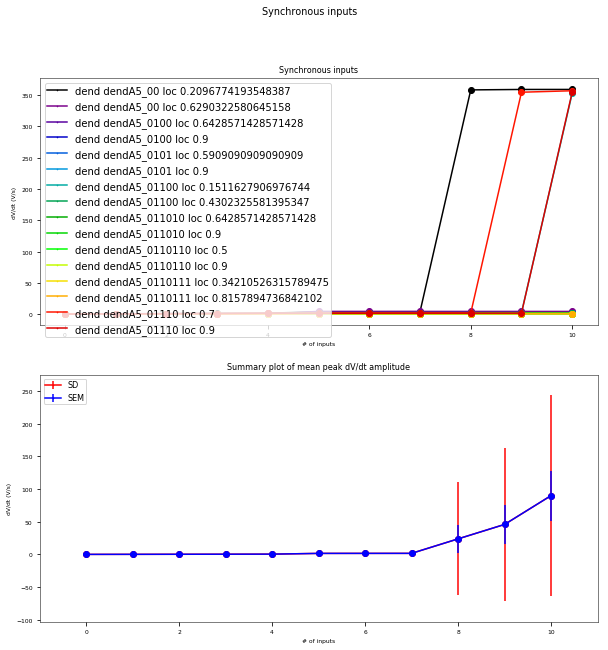

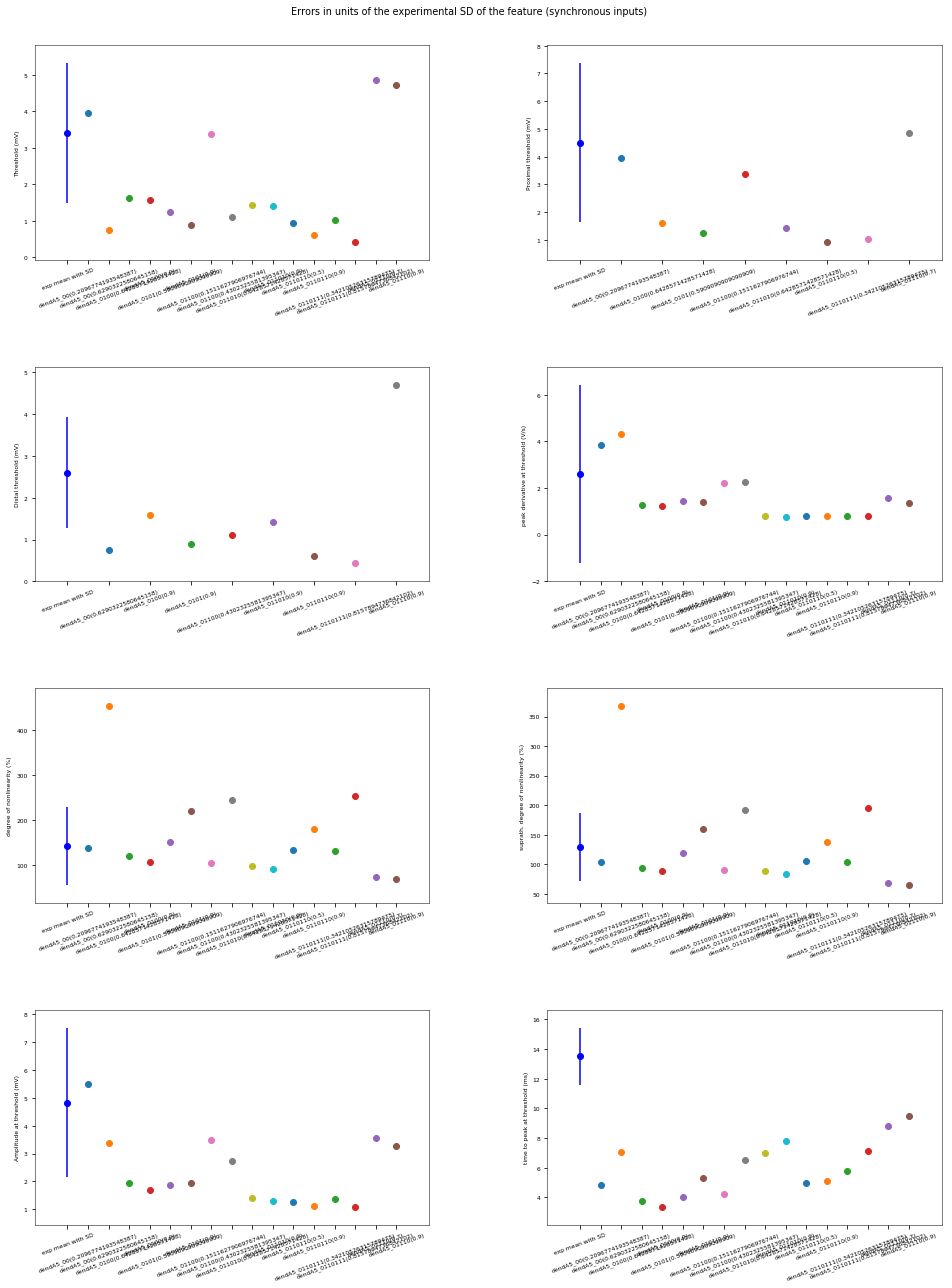

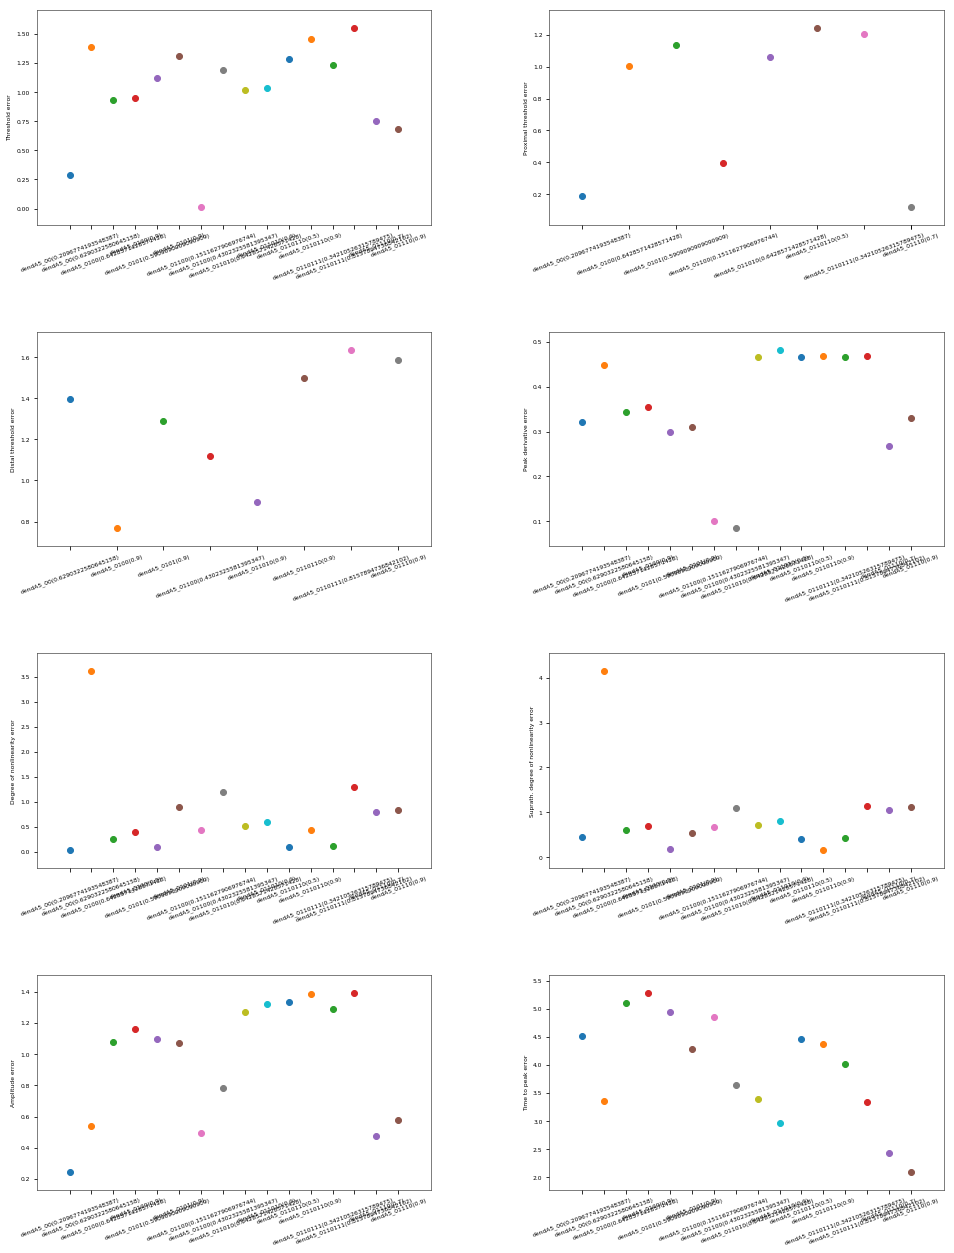

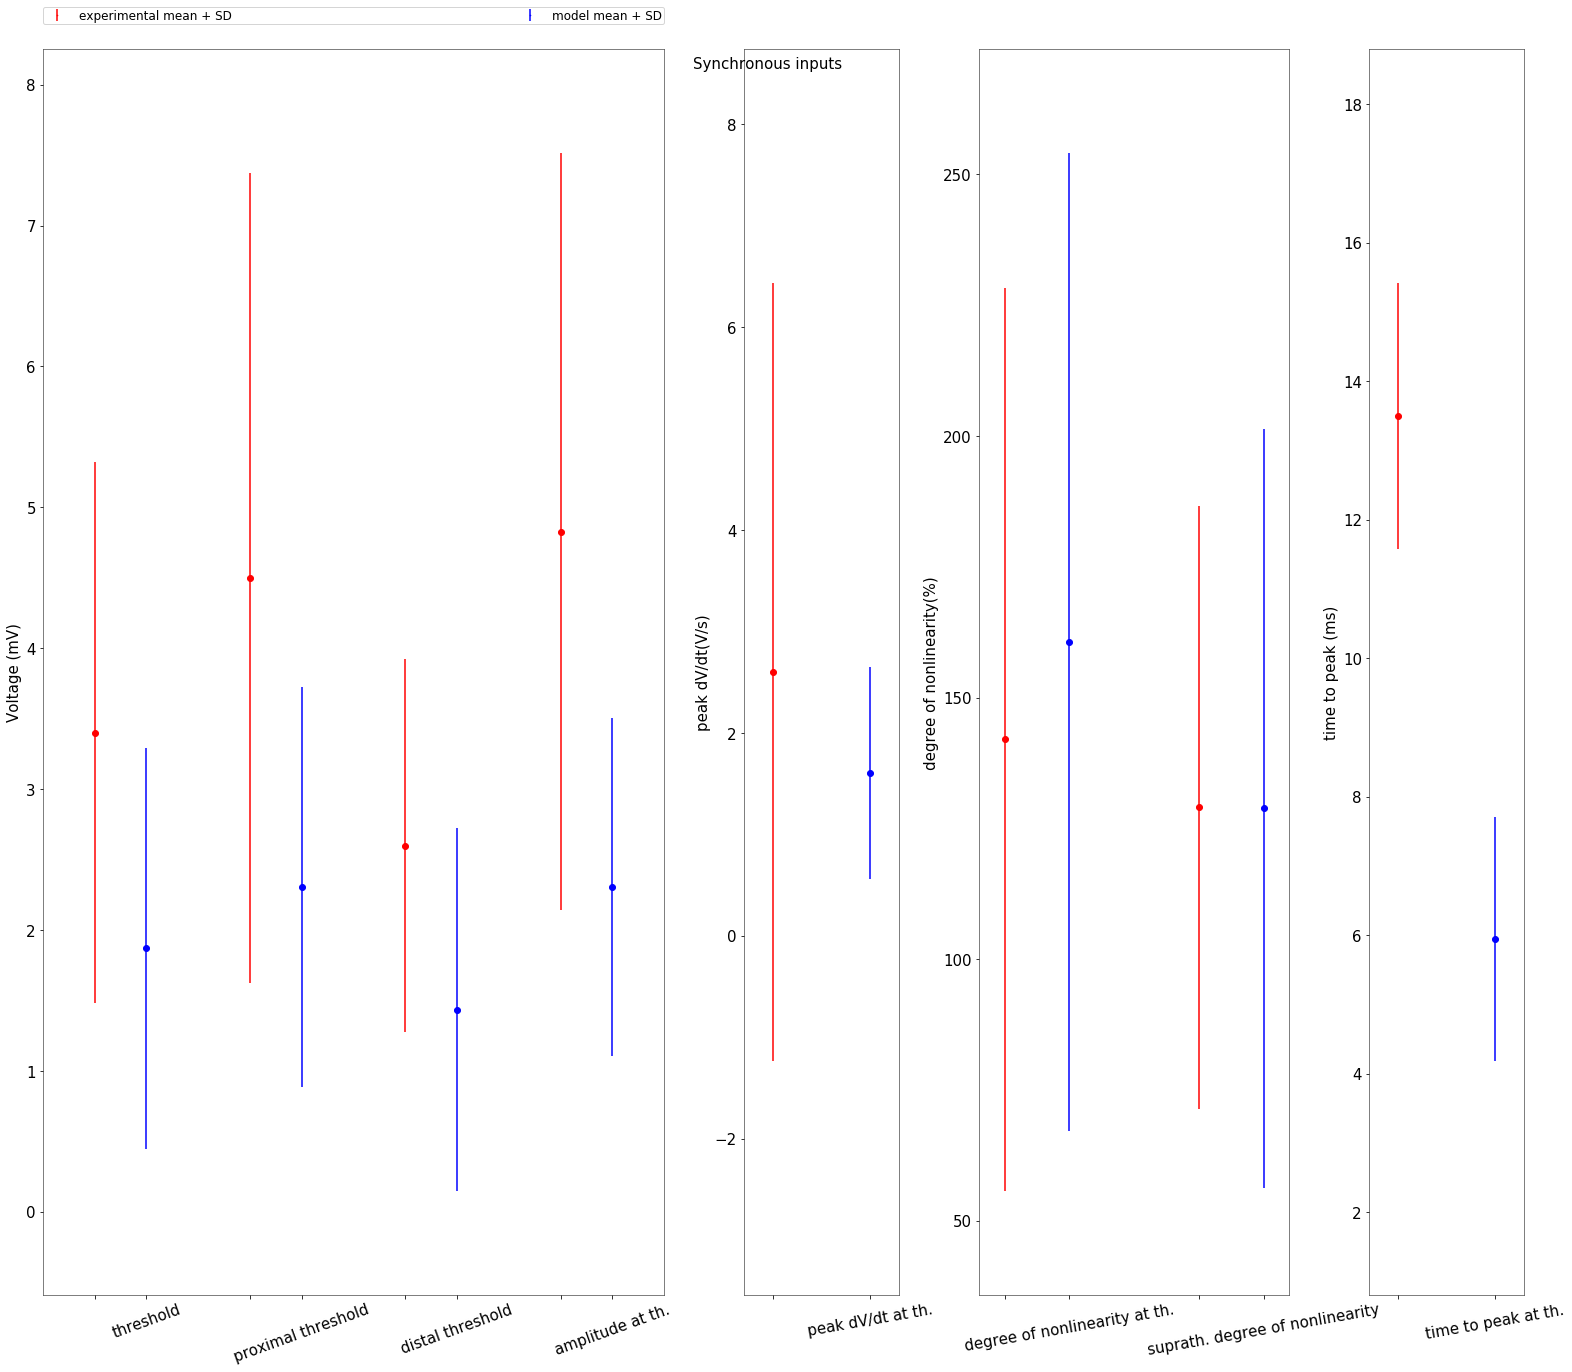

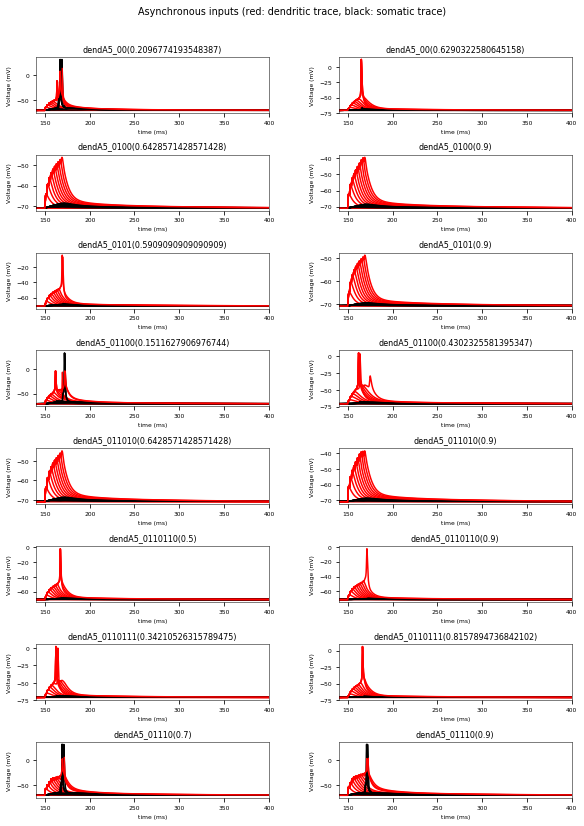

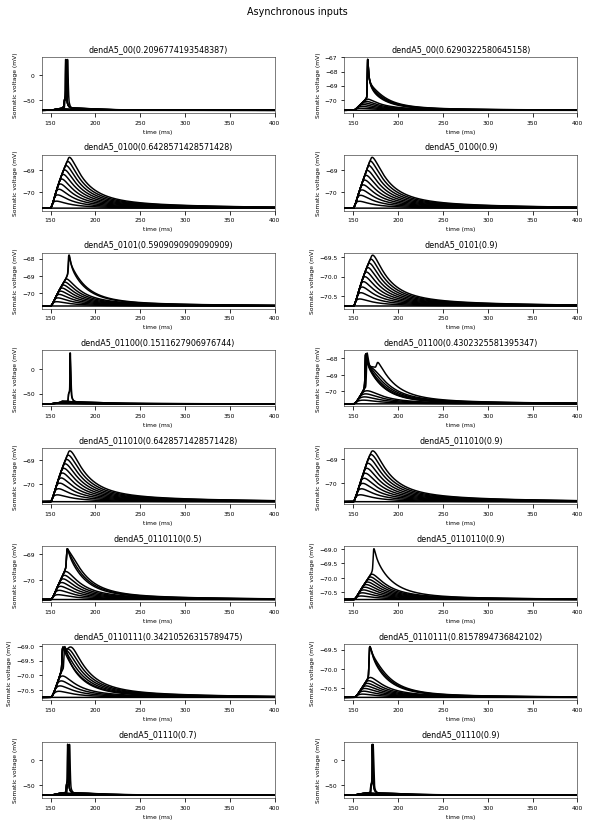

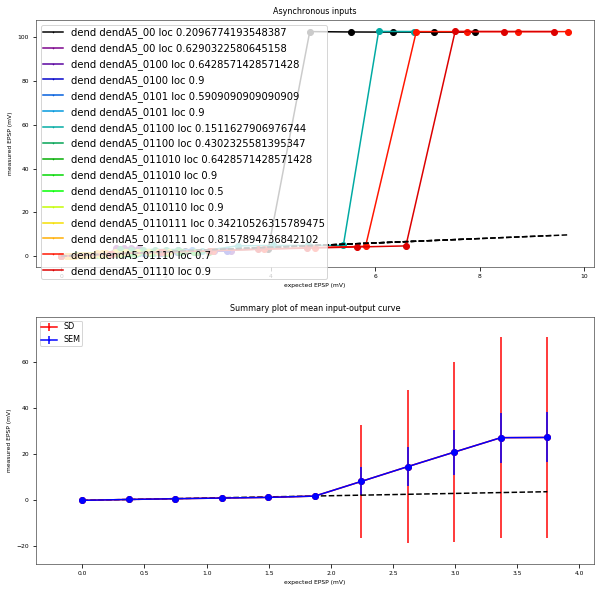

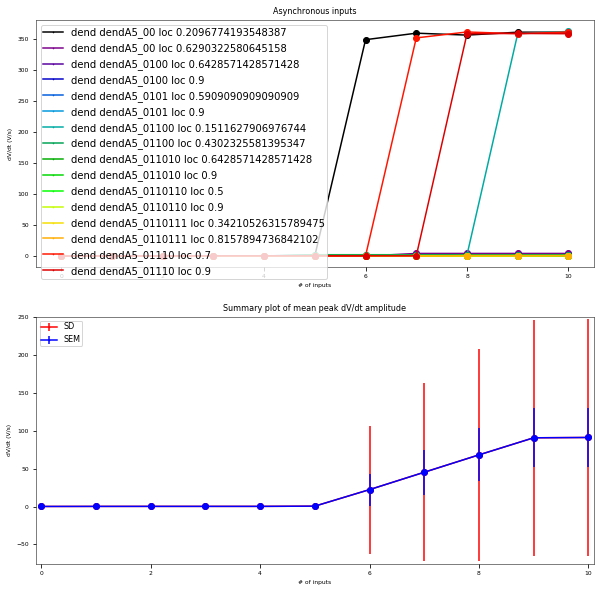

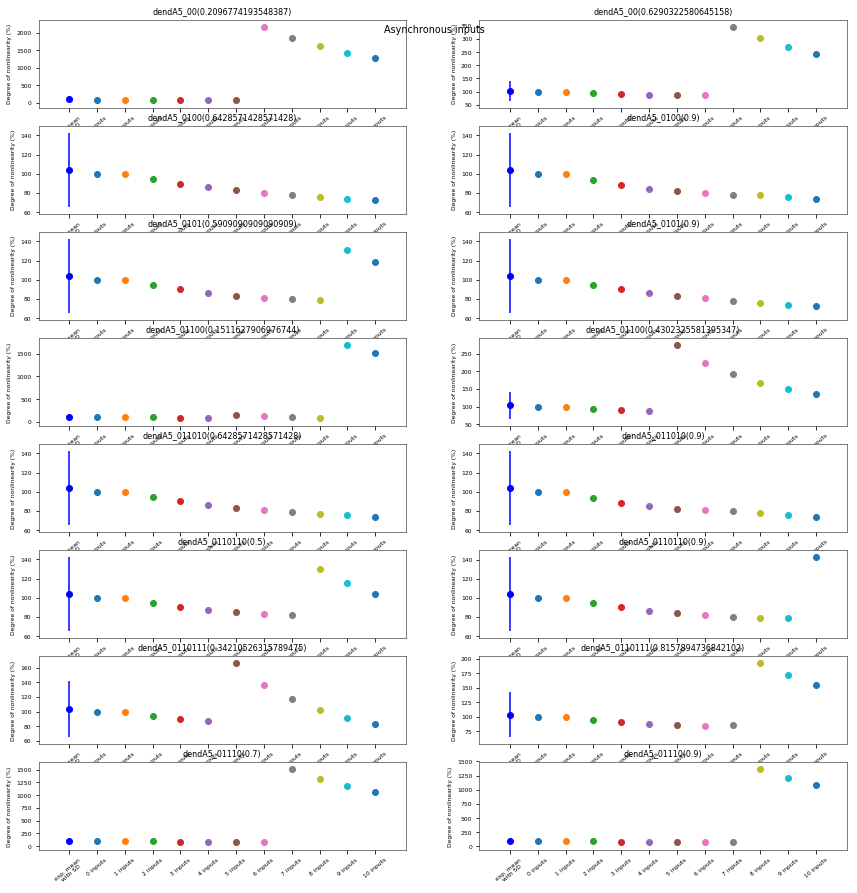

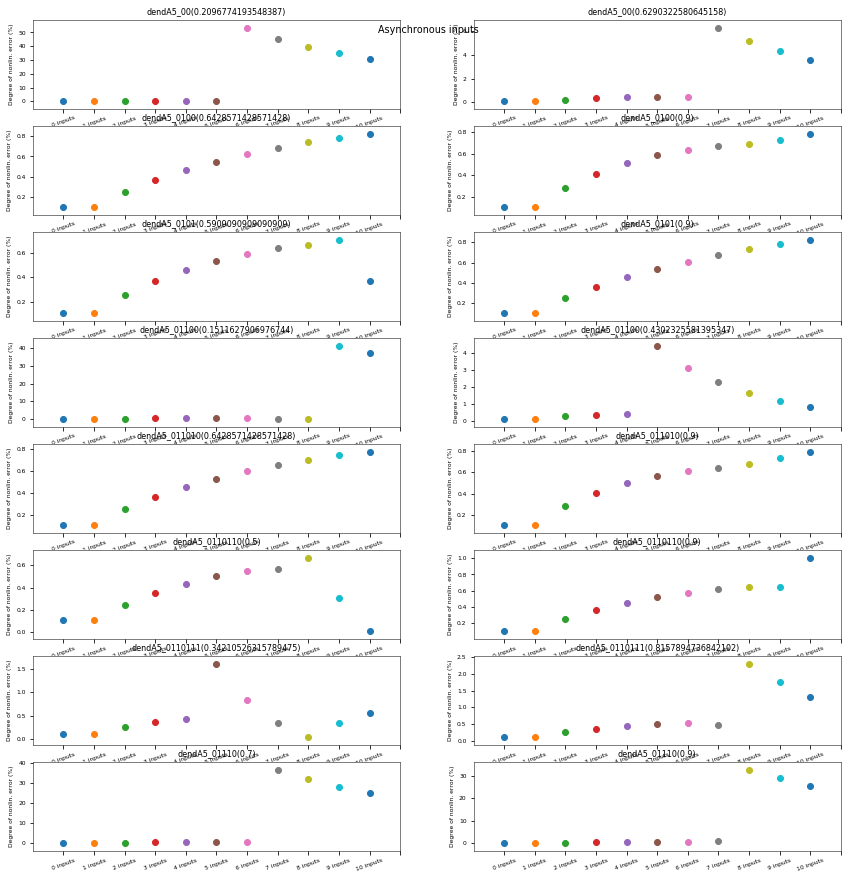

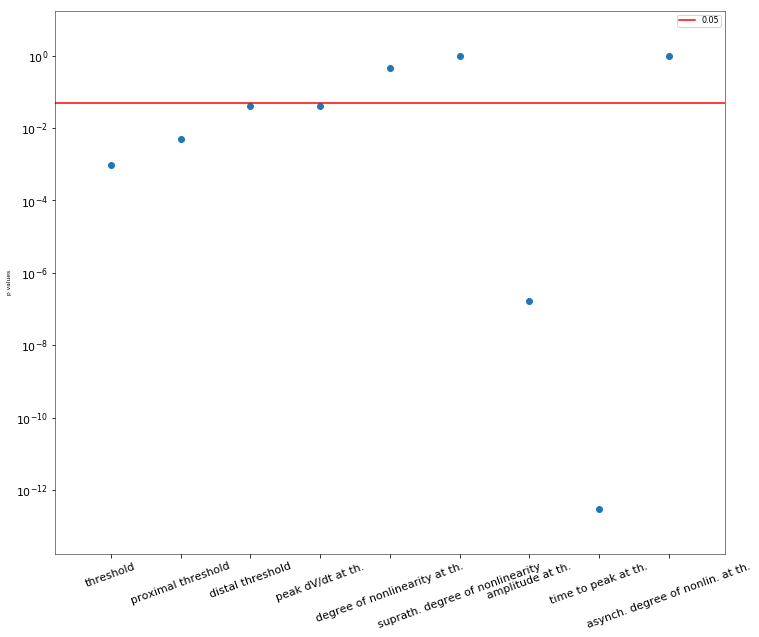

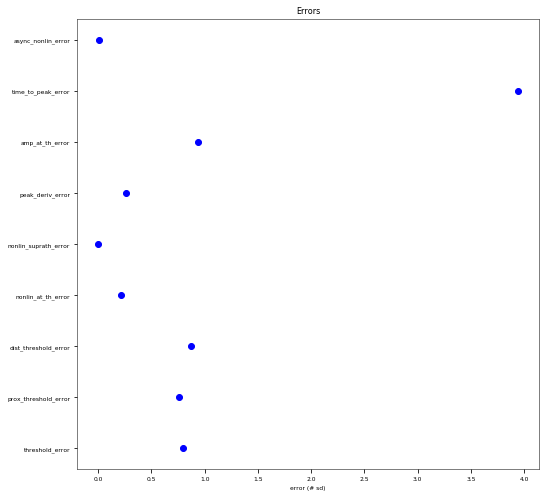

In [14]:
#setting synapse parameters

# If model.AMPA_name and/or model.NMDA_name is set here, the model's own receptor models (mod files) are used. 
# If these are not set, HippoUnit's default synapse model is used. (AMPA: NEURON's Exp2Syn, NMDA: https://github.com/KaliLab/hippounit/blob/master/hippounit/tests/default_NMDAr/NMDA_CA1_pyr_SC.mod) 

# Similarly to HippoUnit's default synapse, this model used the NEURON's Exp2Syn function as synaptic input,
# so here the same time constants are used as originally in the model.
# As the model doesn't have an NMDA receptor model, the default one of HippoUnit is used as the NMDA component of the synapse

model.AMPA_tau1 = 0.2
model.AMPA_tau2 = 5

# Instantiate the test class
test = tests.ObliqueIntegrationTest(observation = observation, save_all = True, force_run_synapse=False, force_run_bin_search=False, show_plot = True, base_directory = base_directory)

# Number of parallel processes
test.npool = 10

try: 
    # Run the test
    score = test.judge(model)
    #Summarize and print the score achieved by the model on the test using SciUnit's summarize function
    score.summarize()
except Exception as e:
    print('Model: ' + model.name + ' could not be run')
    print(e)
    pass 

### Pathway Interaction Test

The experimental data is from Takahashi & Magee 2009 (https://doi.org/10.1016/j.neuron.2009.03.007).


In [3]:
# Load target data
with open('../target_features/pathway_interaction_target_data.json') as f:
    observation = json.load(f, object_pairs_hook=collections.OrderedDict)

IPython.display.HTML(json2html.convert(json = observation))


The built in Exp2Syn is used as the AMPA component. Tau1 = 0.2 ,Tau2 = 5 .


The default NMDA model of HippoUnit is used with Jahr, Stevens voltage dependence.

Adjusting synaptic weights ...
SC AMPA weight 0.00022381523510706173
PP AMPA weight 0.0010618885458777395
final dend_loc SC :  [['dendA5_01100', 0.872093023255814], ['dendA5_01111111111110101', 0.2894736842105263], ['dendA5_01111111111101', 0.9761904761904762], ['dendA5_0111100', 0.98], ['dendA5_01111111101', 0.07446808510638298], ['dendA5_01111111100', 0.11290322580645161], ['dendA5_011111111110', 0.573170731707317], ['dendA5_011111111111100', 0.39655172413793105], ['dendA5_01100', 0.22093023255813954]]
final dend_loc PP :  [['dendA5_0111111111111111110', 0.6111111111111112], ['dendA5_0111111111111111111110', 0.34210526315789475], ['dendA5_011111111111111110110', 0.6428571428571429], ['dendA5_0111111111111111100', 0.5408163265306123], ['dendA5_01111111111111111010', 0.8555555555555555], ['dendA5_01111111111111111010', 0.45555

/home/saray/.local/lib/python3.8/site-packages/efel/api.py:499: RuntimeWarning: Error while calculating feature AP_amplitude: 
Voltage never goes below or above threshold in spike detection.

Voltage never goes below or above threshold in spike detection.

Voltage never goes below or above threshold in spike detection.

Voltage never goes below or above threshold in spike detection.

Voltage never goes below or above threshold in spike detection.

Voltage never goes below or above threshold in spike detection.

Voltage never goes below or above threshold in spike detection.

 At least one spike required for calculation of min_AHP_indices.

Feature [min_AHP_indices] is missing

Feature [peak_voltage] is missing
AP_amplitude: Error calculating peak_voltage
  warnings.warn(
/home/saray/.local/lib/python3.8/site-packages/efel/api.py:499: RuntimeWarning: Error while calculating feature AP_begin_voltage: 
 At least one spike required for calculation of min_AHP_indices.

Feature [min_AHP_indi

Results are saved in the directory:  ../published_models_validation_results/results/pathway_interaction/Katz_et_al_2009/


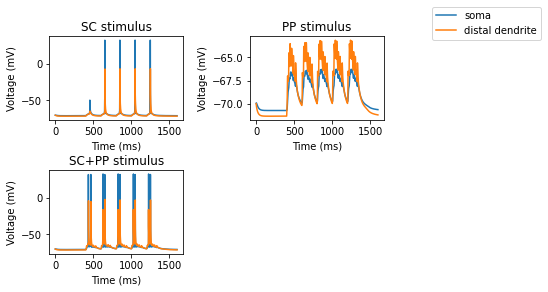

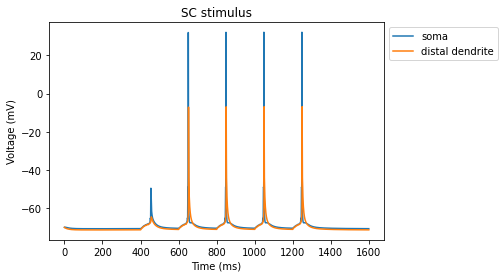

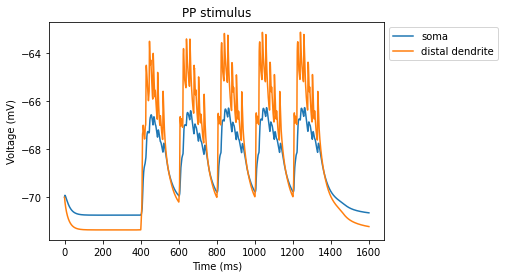

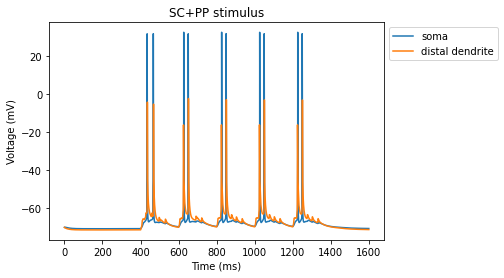

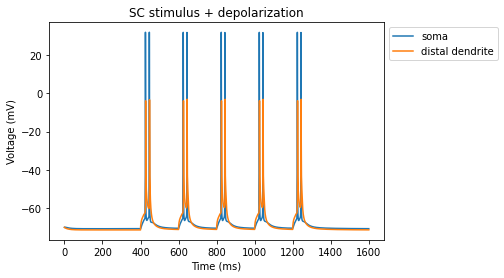

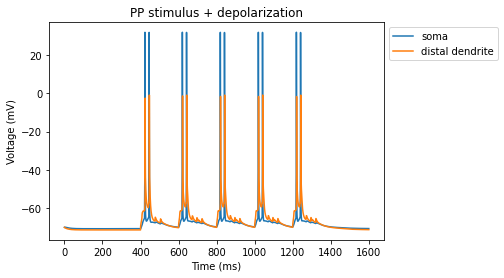

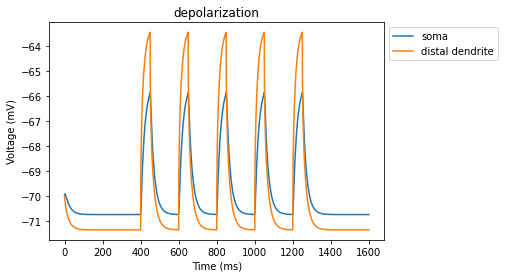

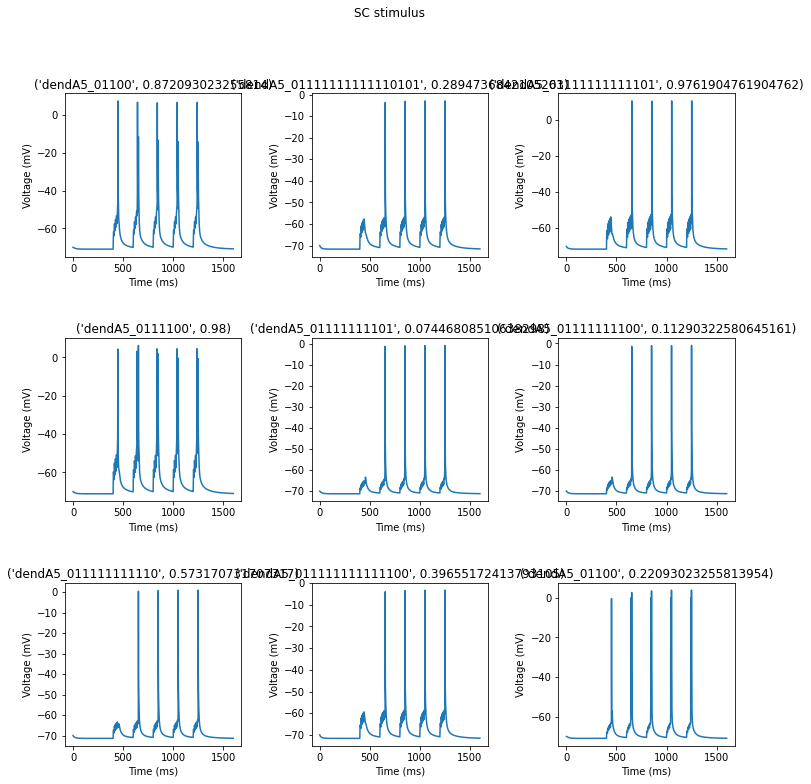

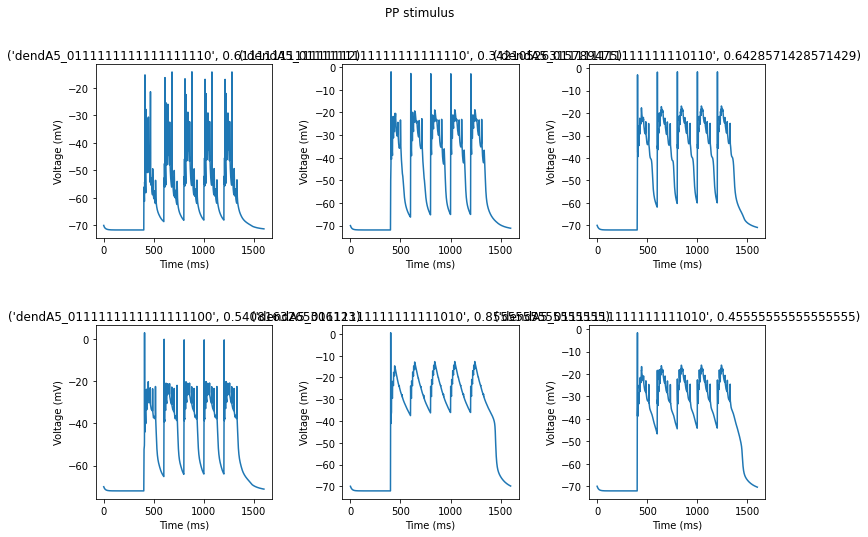

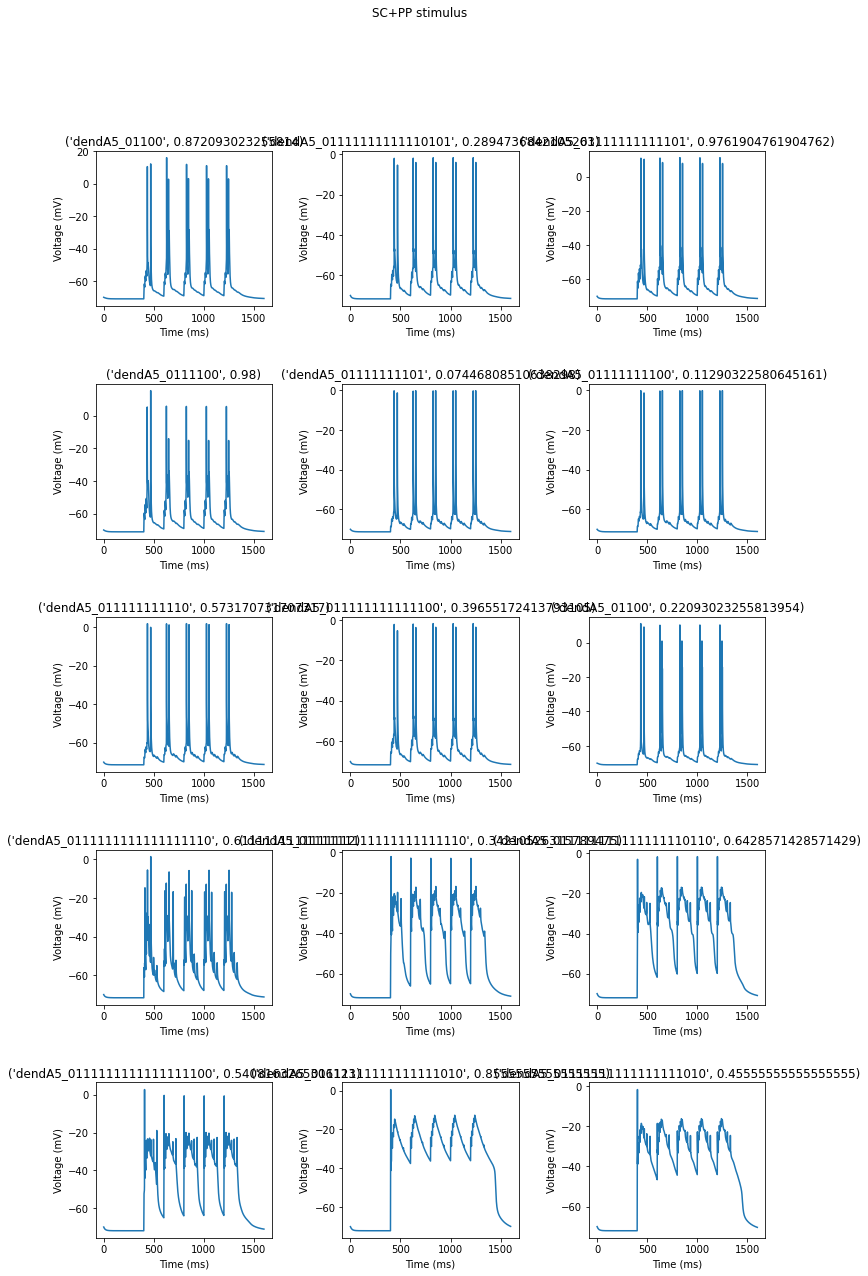

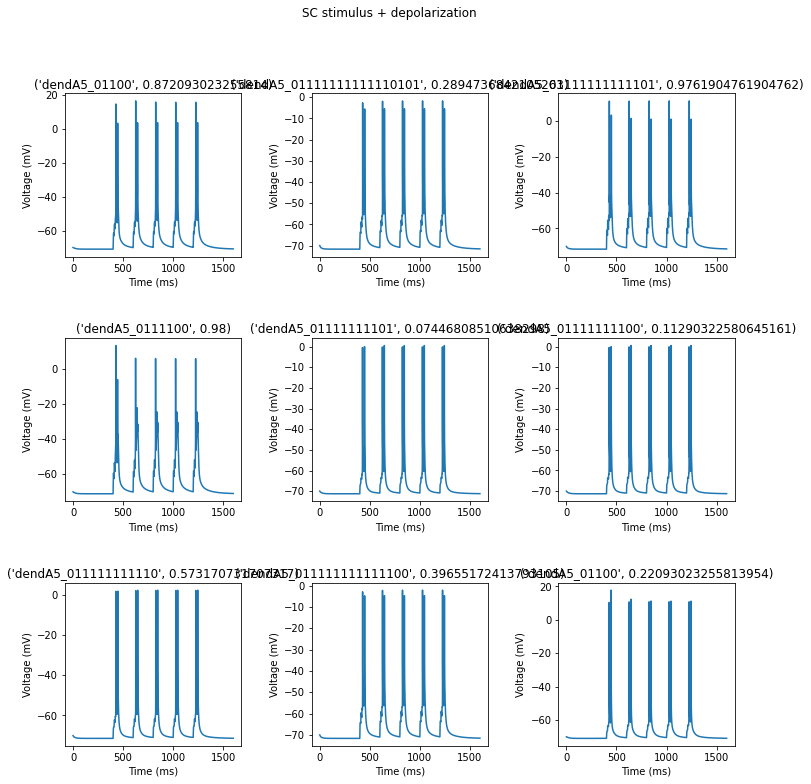

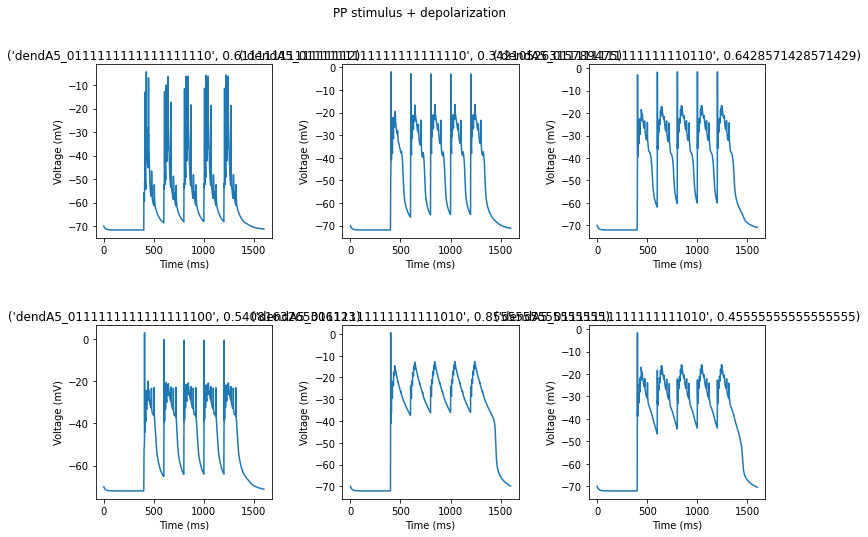

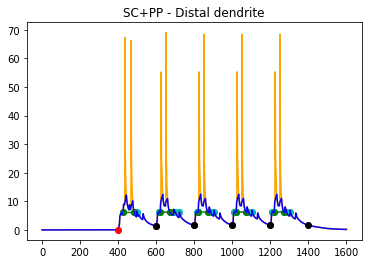

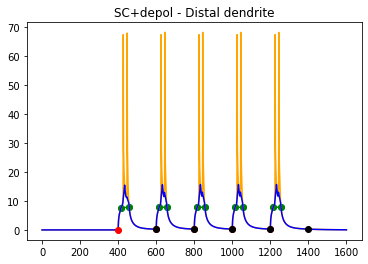

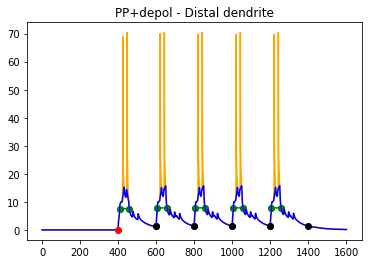

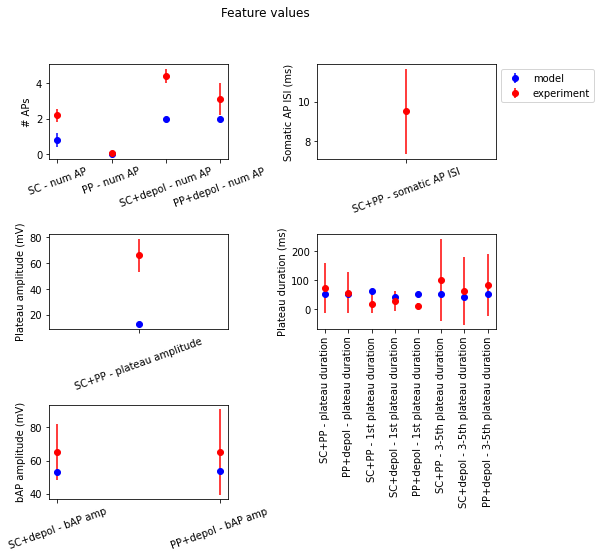

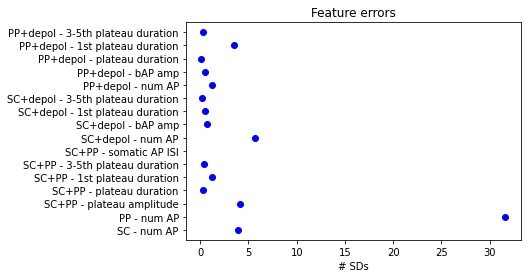

In [4]:
# Load stimuli file
stim_file = pkg_resources.resource_filename("hippounit", "tests/stimuli/PathwayInteraction_stim/stim_PathwayInteraction_test.json")

with open(stim_file, 'r') as f:
    config = json.load(f, object_pairs_hook=collections.OrderedDict)
      
#setting synapse parameters

# If model.AMPA_name and/or model.NMDA_name is set here, the model's own receptor models (mod files) are used. 
# If these are not set, HippoUnit's default synapse model is used. (AMPA: NEURON's Exp2Syn, NMDA: https://github.com/KaliLab/hippounit/blob/master/hippounit/tests/default_NMDAr/NMDA_CA1_pyr_SC.mod) 

# Similarly to HippoUnit's default synapse, this model used the NEURON's Exp2Syn function as synaptic input,
# so here the same time constants are used as originally in the model.
# As the model doesn't have an NMDA receptor model, the default one of HippoUnit is used as the NMDA component of the synapse

model.AMPA_tau1 = 0.2
model.AMPA_tau2 = 5

# Instantiate the test class
test = tests.PathwayInteraction(num_of_dend_locations = 15, observation = observation, config = config, save_all = True, force_run=False, force_run_adjust_syn_weight=False, show_plot = True, base_directory = base_directory)

# Number of parallel processes
test.npool = 25

try: 
    # Run the test
    score = test.judge(model)
    #Summarize and print the score achieved by the model on the test using SciUnit's summarize function
    score.summarize()
except Exception as e:
    print('Model: ' + model.name + ' could not be run')
    print(e)
    pass 


In [15]:
%load_ext watermark

In [16]:
%watermark -v -m -p sciunit,efel,numpy,quantities,scipy,matplotlib,neuron

CPython 3.5.2
IPython 5.6.0

sciunit 0.2.1.1
efel 3.0.58
numpy 1.16.4
quantities 0.12.1
scipy 1.3.0
matplotlib 3.0.3
neuron 7.6.2

compiler   : GCC 5.4.0 20160609
system     : Linux
release    : 4.15.0-60-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 56
interpreter: 64bit
